# 検定と信頼区間: 比率の検定と信頼区間

* 黒木玄
* 2022-05-31～2022-06-09

$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Stern}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
$


このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#比率の検定と信頼区間" data-toc-modified-id="比率の検定と信頼区間-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>比率の検定と信頼区間</a></span><ul class="toc-item"><li><span><a href="#P値と信頼区間の定義の復習" data-toc-modified-id="P値と信頼区間の定義の復習-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>P値と信頼区間の定義の復習</a></span></li><li><span><a href="#二項分布モデルのP値達の定義を1枚の図で要約" data-toc-modified-id="二項分布モデルのP値達の定義を1枚の図で要約-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>二項分布モデルのP値達の定義を1枚の図で要約</a></span></li><li><span><a href="#4種のP値函数のプロット" data-toc-modified-id="4種のP値函数のプロット-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>4種のP値函数のプロット</a></span></li><li><span><a href="#4種の信頼区間の同時プロット" data-toc-modified-id="4種の信頼区間の同時プロット-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4種の信頼区間の同時プロット</a></span></li></ul></li><li><span><a href="#Clopper-Pearson" data-toc-modified-id="Clopper-Pearson-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clopper-Pearson</a></span><ul class="toc-item"><li><span><a href="#Clopper-Pearsonの信頼区間を与えるP値関数" data-toc-modified-id="Clopper-Pearsonの信頼区間を与えるP値関数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間を与えるP値関数</a></span></li><li><span><a href="#Clopper-Pearsonの信頼区間" data-toc-modified-id="Clopper-Pearsonの信頼区間-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間</a></span></li><li><span><a href="#Clopper-Pearsonの信頼区間の図による把握" data-toc-modified-id="Clopper-Pearsonの信頼区間の図による把握-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間の図による把握</a></span></li></ul></li><li><span><a href="#Sterne" data-toc-modified-id="Sterne-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sterne</a></span><ul class="toc-item"><li><span><a href="#Sterneの信頼区間を与えるP値関数" data-toc-modified-id="Sterneの信頼区間を与えるP値関数-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sterneの信頼区間を与えるP値関数</a></span></li><li><span><a href="#Sterneの信頼区間" data-toc-modified-id="Sterneの信頼区間-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sterneの信頼区間</a></span></li><li><span><a href="#Sterneの信頼区間の図による把握" data-toc-modified-id="Sterneの信頼区間の図による把握-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Sterneの信頼区間の図による把握</a></span></li><li><span><a href="#おまけ:-R言語のbinom.testについて" data-toc-modified-id="おまけ:-R言語のbinom.testについて-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>おまけ: R言語のbinom.testについて</a></span></li><li><span><a href="#おまけ関連問題:-R言語のコードを実行してみよ." data-toc-modified-id="おまけ関連問題:-R言語のコードを実行してみよ.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>おまけ関連問題: R言語のコードを実行してみよ.</a></span></li></ul></li><li><span><a href="#Wilson" data-toc-modified-id="Wilson-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Wilson</a></span><ul class="toc-item"><li><span><a href="#Wilsonの信頼区間を与えるP値函数" data-toc-modified-id="Wilsonの信頼区間を与えるP値函数-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Wilsonの信頼区間を与えるP値函数</a></span></li><li><span><a href="#Wilsonの信頼区間" data-toc-modified-id="Wilsonの信頼区間-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Wilsonの信頼区間</a></span></li><li><span><a href="#Wilsonの信頼区間の図による把握" data-toc-modified-id="Wilsonの信頼区間の図による把握-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Wilsonの信頼区間の図による把握</a></span></li><li><span><a href="#おまけ:-R言語のprop.testについて" data-toc-modified-id="おまけ:-R言語のprop.testについて-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>おまけ: R言語のprop.testについて</a></span></li><li><span><a href="#Pearsonのχ²検定との関係" data-toc-modified-id="Pearsonのχ²検定との関係-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Pearsonのχ²検定との関係</a></span></li><li><span><a href="#おまけ:-多項分布モデルにおけるPearsonのχ²検定" data-toc-modified-id="おまけ:-多項分布モデルにおけるPearsonのχ²検定-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>おまけ: 多項分布モデルにおけるPearsonのχ²検定</a></span></li><li><span><a href="#おまけ(より進んだ話題):-一般のχ²検定で使うχ²分布の自由度" data-toc-modified-id="おまけ(より進んだ話題):-一般のχ²検定で使うχ²分布の自由度-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>おまけ(より進んだ話題): 一般のχ²検定で使うχ²分布の自由度</a></span></li></ul></li><li><span><a href="#Wald" data-toc-modified-id="Wald-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wald</a></span><ul class="toc-item"><li><span><a href="#Waldの信頼区間を与えるP値関数" data-toc-modified-id="Waldの信頼区間を与えるP値関数-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Waldの信頼区間を与えるP値関数</a></span></li><li><span><a href="#Waldの信頼区間" data-toc-modified-id="Waldの信頼区間-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Waldの信頼区間</a></span></li><li><span><a href="#Waldの信頼区間の図による把握" data-toc-modified-id="Waldの信頼区間の図による把握-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Waldの信頼区間の図による把握</a></span></li><li><span><a href="#必修問題:-大阪都構想に関する住民投票の結果から得られる信頼区間達" data-toc-modified-id="必修問題:-大阪都構想に関する住民投票の結果から得られる信頼区間達-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>必修問題: 大阪都構想に関する住民投票の結果から得られる信頼区間達</a></span><ul class="toc-item"><li><span><a href="#Julia言語による計算の仕方" data-toc-modified-id="Julia言語による計算の仕方-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Julia言語による計算の仕方</a></span></li><li><span><a href="#WolframAlphaによる計算の仕方" data-toc-modified-id="WolframAlphaによる計算の仕方-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>WolframAlphaによる計算の仕方</a></span></li></ul></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : x*y
safediv(x, y) = x == 0 ? x : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

__Clopper-Pearsonの節の準備__

In [4]:
# cdf = 累積分布函数
# ccdf(dist, x) = 1 - cdf(dist, x)

function pvalue_clopper_pearson(dist::DiscreteUnivariateDistribution, x)
    min(1, 2cdf(dist, x), 2ccdf(dist, x-1))
end
pvalue_clopper_pearson(n, k, p) = pvalue_clopper_pearson(Binomial(n, p), k)

function confint_clopper_pearson(n, k; α = 0.05)
    p_L = k > 0 ? quantile(Beta(k, n-k+1), α/2) : zero(α)
    p_U = k < n ? quantile(Beta(k+1, n-k), 1-α/2) : one(α)
    [p_L, p_U]
end

confint_clopper_pearson (generic function with 1 method)

In [5]:
n, k, α = 100, 30, 0.05
kmin, kmax = 0, 65
p_L, p_U = confint_clopper_pearson(n, k; α)
@show [p_L, p_U];

[p_L, p_U] = [0.21240642048953662, 0.39981467617980404]


In [6]:
dist_L, dist_U = Binomial(n, p_L), Binomial(n, p_U)

(Binomial{Float64}(n=100, p=0.21240642048953662), Binomial{Float64}(n=100, p=0.39981467617980404))

In [7]:
var"Clopper-Pearson: 下側では p = p_L がぎりぎり" = plot(; size=(500, 300))
plot!(k -> mypdf(dist_L, k), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(k -> mypdf(dist_L, k), k-0.5, kmax+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(100α/2)%", :blue, :left, 10))
title!("Binomial(n=$n, p=p_L),  p_L=$(round(p_L; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
plot!(; ylim=(-0.007, 0.105));

In [8]:
var"Clopper-Pearson: 上側では p = p_U がぎりぎり" = plot(; size=(500, 300))
plot!(k -> mypdf(dist_U, k), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(k -> mypdf(dist_U, k), kmin-0.5, k+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
annotate!(k-2, 0.01, text("$(100α/2)%", :red, :right, 10))
title!("Binomial(n=$n, p=p_U),  p_U=$(round(p_U; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_U]; label="n p_L = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!(; ylim=(-0.007, 0.105));

In [9]:
var"Clopper-Pearson: n × 95%信頼区間" = plot(; size=(500, 300))

plot!(k -> mypdf(dist_L, k), kmin-0.5, 47+0.5;
    label="", c=1)
plot!(k -> mypdf(dist_L, k), k-0.5, 47+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(100α/2)%", :blue, :left, 10))

plot!(k -> mypdf(dist_U, k), 15-0.5, kmax+0.5;
    label="", c=2)
plot!(k -> mypdf(dist_U, k), 15-0.5, k+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
annotate!(k-2, 0.01, text("$(100α/2)%", :red, :right, 10))

vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
vline!([n*p_U]; label="n p_U = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!([n*p_L, n*p_U], fill(-0.003, 2); label="", c=:red, lw=5)
title!("n = $n,  [n p_L, n p_U] = [$(round(n*p_L; digits=2)), $(round(n*p_U; digits=2))]")
plot!(; ylim=(-0.007, 0.105));

__Sterneの節の準備__

In [10]:
_pdf_le(x, (dist, y)) =  pdf(dist, x) ⪅ y

function _search_boundary(f, x0, Δx, param)
    x = x0
    if f(x, param)
        while f(x - Δx, param) x -= Δx end
    else
        x += Δx
        while !f(x, param) x += Δx end
    end
    x
end

function pvalue_sterne(dist::DiscreteUnivariateDistribution, x)
    Px = pdf(dist, x)
    Px == 0 && return Px
    Px == 1 && return Px
    m = mode(dist)
    Px ≈ pdf(dist, m) && return one(Px)
    if x < m
        y = _search_boundary(_pdf_le, 2m - x, 1, (dist, Px))
        cdf(dist, x) + ccdf(dist, y-1)
    else # x > m
        y = _search_boundary(_pdf_le, 2m - x, -1, (dist, Px))
        cdf(dist, y) + ccdf(dist, x-1)
    end
end

function pvalue_sterne(n, k, p)
    0 < p ≤ 1 ? pvalue_sterne(Binomial(n, p), k) : zero(p)
end

# 大きな n についてもうまく行くように
# Sterneの信頼区間の実装は難しい.
function confint_sterne(n, k; α = 0.05)
    a, b = confint_clopper_pearson(n, k; α = α/10)
    ps = find_zeros(a-√eps(), b+√eps()) do p
        logistic(pvalue_sterne(n, k, p)) - logistic(α)
    end
    # 次の行は稀に区間にならない場合への対策
    [first(ps), last(ps)]
end

confint_sterne (generic function with 1 method)

In [11]:
n, k, α = 100, 30, 0.05
kmin, kmax = 0, 65
p_L, p_U = confint_sterne(n, k; α)
@show [p_L, p_U];

[p_L, p_U] = [0.21419730401454815, 0.3996107372232876]


In [12]:
dist_L = Binomial(n, p_L)
k_L = minimum(i for i in 0:n if !(pdf(dist_L, i) ⪅ pdf(dist_L, k))) - 1
cdf_L = cdf(dist_L, k_L)
ccdf_L = ccdf(dist_L, k-1)
cdf_L + ccdf_L

0.050000000000000135

In [13]:
dist_U = Binomial(n, p_U)
k_U = maximum(i for i in 0:n if !(pdf(dist_U, i) ⪅ pdf(dist_U, k))) + 1
cdf_U = cdf(dist_U, k)
ccdf_U = ccdf(dist_U, k_U-1)
cdf_U + ccdf_U

0.05184087343317326

In [14]:
var"Sterne: 下側では p = p_L がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_L, i), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(i -> mypdf(dist_L, i), k-0.5, kmax+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
plot!(i -> mypdf(dist_L, i), kmin-0.5, k_L+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
plot!([k_L+0.5, k-0.5], fill(pdf(dist_L, k), 2); label="", c=:blue, ls=:dot)
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))
title!("Binomial(n=$n, p=p_L),  p_L=$(round(p_L; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
plot!(; ylim=(-0.007, 0.105));

In [15]:
var"Sterne: 上側では p = p_U がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_U, i), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(i -> mypdf(dist_U, i), kmin-0.5, k+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
plot!(i -> mypdf(dist_U, i), k_U-0.5, kmax+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
plot!([k+0.5, k_U-0.5], fill(pdf(dist_U, k), 2); label="", c=:red, ls=:dot)
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))
title!("Binomial(n=$n, p=p_U),  p_U=$(round(p_U; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_U]; label="n p_L = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!(; ylim=(-0.007, 0.105));

In [16]:
var"Sterne: n × 95%信頼区間" = plot(; size=(500, 300))

plot!(k -> mypdf(dist_L, k), kmin-0.5, 47+0.5;
    label="", c=1)
plot!(k -> mypdf(dist_L, k), k-0.5, 47+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
plot!(i -> mypdf(dist_L, i), kmin-0.5, k_L+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
#plot!([k_L+0.5, k-0.5], fill(pdf(dist_L, k), 2); label="", c=:blue, ls=:dot)
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))

plot!(i -> mypdf(dist_U, i), 15-0.5, kmax+0.5;
    label="", c=2)
plot!(i -> mypdf(dist_U, i), 15-0.5, k+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
plot!(i -> mypdf(dist_U, i), k_U-0.5, kmax+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
#plot!([k+0.5, k_U-0.5], fill(pdf(dist_U, k), 2); label="", c=:red, ls=:dot)
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))

vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
vline!([n*p_U]; label="n p_U = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!([n*p_L, n*p_U], fill(-0.003, 2); label="", c=:red, lw=5)
title!("n = $n,  [n p_L, n p_U] = [$(round(n*p_L; digits=2)), $(round(n*p_U; digits=2))]")
plot!(; ylim=(-0.007, 0.105));

__Wilsonの節の準備__

In [17]:
function pvalue_wilson(n, k, p)
    p̂ = k/n
    SE = √(p*(1-p)/n)
    2ccdf(Normal(), abs(p̂ - p)/SE)
end

function confint_wilson(n, k; α = 0.05)
    p̂ = k/n
    z = quantile(Normal(), 1-α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

confint_wilson (generic function with 1 method)

In [18]:
α = 0.05
z = quantile(Normal(), 1 - α/2)

var"z_{0.025}の定義" = plot()
plot!(Normal(), -5,  5; label="")
plot!(Normal(), -5, -z; label="", c=1, fillrange=0, fc=:red, fa=0.3)
plot!(Normal(),  z,  5; label="", c=1, fillrange=0, fc=:red, fa=0.3)
plot!([-z, -z, NaN, z, z],
    [0, pdf(Normal(), -z), NaN, 0, pdf(Normal(), z)];
    label="\$\\pm z_{0.025}\$", c=:red)
title!("Normal(0,1)"; xtick=-10:10)
annotate!(-2.2, 0.06, text("2.5%", 10, :red, :right))
annotate!( 2.2, 0.06, text("2.5%", 10, :red, :left))
plot!(; legendfontsize=14);

In [19]:
n, k, α = 100, 30, 0.05
kmin, kmax = 0, 65
p_L, p_U = confint_wilson(n, k; α)
@show [p_L, p_U];

[p_L, p_U] = [0.2189488529493274, 0.395848546333467]


In [20]:
dist_L, dist_U = Binomial(n, p_L), Binomial(n, p_U)
normal_L = Normal(n*p_L, √(n*p_L*(1-p_L)))
normal_U = Normal(n*p_U, √(n*p_U*(1-p_U)))
k_L, k_U = 2n*p_L - k, 2n*p_U - k
cdf_L, ccdf_L = cdf(normal_L, k_L), ccdf(normal_L, k)
cdf_U, ccdf_U = cdf(normal_U, k), ccdf(normal_U, k_U);

In [21]:
var"Wilson: 下側では p = p_L がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_L, i), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, kmax+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))
title!("Binomial(n=$n, p=p_L),  p_L=$(round(p_L; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
plot!(; ylim=(-0.007, 0.105));

In [22]:
var"Wilson: 上側では p = p_U がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_U, i), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), kmin-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))
title!("Binomial(n=$n, p=p_U),  p_U=$(round(p_U; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_U]; label="n p_L = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!(; ylim=(-0.007, 0.105));

In [23]:
var"Wilson: n × 95%信頼区間" = plot(; size=(500, 300))

plot!(i -> mypdf(dist_L, i), kmin-0.5, 47+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, 47+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))

plot!(i -> mypdf(dist_U, i), 15-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), 15-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))

vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
vline!([n*p_U]; label="n p_U = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!([n*p_L, n*p_U], fill(-0.003, 2); label="", c=:red, lw=5)
title!("n = $n,  [n p_L, n p_U] = [$(round(n*p_L; digits=2)), $(round(n*p_U; digits=2))]")
plot!(; ylim=(-0.007, 0.105));

__Waldの節の準備__

In [24]:
function pvalue_wald(n, k, p)
    p̂ = k/n
    SEhat = √(p̂*(1-p̂)/n)
    2ccdf(Normal(), abs(p̂ - p)/SEhat)
end

function confint_wald(n, k; α = 0.05)
    p̂ = k/n
    SEhat = √(p̂*(1-p̂)/n)
    z = quantile(Normal(), 1-α/2)
    p_L = p̂ - z*SEhat
    p_U = p̂ + z*SEhat
    [p_L, p_U]
end

confint_wald (generic function with 1 method)

In [25]:
n, k, α = 100, 30, 0.05
kmin, kmax = 0, 65
p_L, p_U = confint_wald(n, k; α)
@show [p_L, p_U];

[p_L, p_U] = [0.21018316681457927, 0.3898168331854207]


In [26]:
dist_L, dist_U = Binomial(n, p_L), Binomial(n, p_U)
p̂ = k/n
normal_L = Normal(n*p_L, √(n*p̂*(1-p̂)))
normal_U = Normal(n*p_U, √(n*p̂*(1-p̂)))
k_L, k_U = 2n*p_L - k, 2n*p_U - k
cdf_L, ccdf_L = cdf(normal_L, k_L), ccdf(normal_L, k)
cdf_U, ccdf_U = cdf(normal_U, k), ccdf(normal_U, k_U);

In [27]:
var"Wald: 下側では p = p_L がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_L, i), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, kmax+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))
title!("Binomial(n=$n, p=p_L),  p_L=$(round(p_L; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
plot!(; ylim=(-0.007, 0.105));

In [28]:
var"Wald: 上側では p = p_U がぎりぎり" = plot(; size=(500, 300))
plot!(i -> mypdf(dist_U, i), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), kmin-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))
title!("Binomial(n=$n, p=p_U),  p_U=$(round(p_U; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_U]; label="n p_L = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!(; ylim=(-0.007, 0.105));

In [29]:
var"Wald: n × 95%信頼区間" = plot(; size=(500, 300))

plot!(i -> mypdf(dist_L, i), kmin-0.5, 47+0.5;
    label="", c=1)
plot!(normal_L; label="normal approx", c=:blue)
plot!(x -> pdf(normal_L, x), k, 47+0.5;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_L, x), kmin-0.5, k_L;
    fillrange=0, c=:blue, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(round(100ccdf_L; digits=1))%", :blue, :left, 10))
annotate!(k_L-2, 0.01, text("$(round(100cdf_L; digits=1))%", :blue, :right, 10))

plot!(i -> mypdf(dist_U, i), 15-0.5, kmax+0.5;
    label="", c=2)
plot!(normal_U; label="normal approx", c=:red)
plot!(x -> pdf(normal_U, x), k_U, kmax+0.5;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="", ls=:dot)
plot!(x -> pdf(normal_U, x), 15-0.5, k;
    fillrange=0, c=:red, fc=:red, fa=0.5, label="")
annotate!(k_U+2, 0.01, text("$(round(100ccdf_U; digits=1))%", :red, :left, 10))
annotate!(k-2, 0.01, text("$(round(100cdf_U; digits=1))%", :red, :right, 10))

vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
vline!([n*p_U]; label="n p_U = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!([n*p_L, n*p_U], fill(-0.003, 2); label="", c=:red, lw=5)
title!("n = $n,  [n p_L, n p_U] = [$(round(n*p_L; digits=2)), $(round(n*p_U; digits=2))]")
plot!(; ylim=(-0.007, 0.105));

__P値達の説明用__

In [30]:
function illustrate_binomial_pvalues()
    n = 20
    p = 0.25
    k = 9
    
    p̂ = k/n
    σ̂² = n*p̂*(1-p̂)
    
    null = Binomial(n, p)
    μ, σ² = mean(null), var(null)
    nullname = distname(null)
    
    f(x) = mypdf(null, x)
    xlim = (-2, n+1)
    xlimk = (k-0.5, n+0.5)
    
    pval = @sprintf "%.03f" pvalue_clopper_pearson(n, k, p)
    cval = @sprintf "%.03f" ccdf(null, k-1)
    P1 = plot(title="(1) Clopper-Pearson")
    plot!(f, xlim...; label="", c=1)
    plot!(f, xlimk...; label="", fillrange=0, c=1, fc=:red, fa=0.5)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    annotate!(k+5, 4f(k), text("P-value = $pval", 10, :red))
    plot!([k+7, k+7], [2.4f(k), 3.6f(k)]; arrow=true, c=:red, label="")
    annotate!(k+6, 3f(k), text("2×", 10, :red, :right))
    annotate!(k+5, 2f(k), text("one-tailed = $cval", 10, :red))
    plot!([k+7, k+1], [1.5f(k), 1.5f(k+1)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)
    
    pval = @sprintf "%.03f" pvalue_sterne(n, k, p)
    j = _search_boundary(_pdf_le, 2mode(null)-k, -1, (null, pdf(null, k)))
    xlimj = (-0.5, j+0.5)
    P2 = plot(title="(2) Sterne")
    plot!(f, xlim...; label="", c=1)
    plot!(f, xlimk...; label="", fillrange=0, c=1, fc=:red, fa=0.5)
    plot!(f, xlimj...; label="", fillrange=0, c=1, fc=:red, fa=0.5)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    plot!([k-0.5, j+0.5], [f(k), f(k)]; label="", c=2, ls=:dash)
    annotate!(k+5, 3f(k), text("P-value = $pval", 10, :red))
    plot!([k+5, k+1], [2.5f(k), 0.8f(k)]; arrow=true, c=:red, label="")
    plot!([k+5, j+1], [2.5f(k), 0.8f(j)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)
    
    pval = @sprintf "%.03f" pvalue_wilson(n, k, p)
    normal = Normal(μ, √σ²)
    g(x) = pdf(normal, x)
    P3 = plot(title="(3) Wilson")
    plot!(f, xlim...; label="", c=1)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    plot!(g, xlim...; ls=:dash, label="Normal(μ=$μ, σ=√$σ²)", c=2)
    plot!(g, k, n; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    plot!(g, -2, 2μ-k; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    annotate!(k+5, 3f(k), text("P-value = $pval", 10, :red))
    plot!([k+5, k+0.5], [2.5f(k), 0.8g(k)]; arrow=true, c=:red, label="")
    plot!([k+5, j+0.2], [2.5f(k), 0.7g(j)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)
    
    pval = @sprintf "%.03f" pvalue_wald(n, k, p)
    normal = Normal(μ, √σ̂²)
    h(x) = pdf(normal, x)
    P4 = plot(title="(4) Wald")
    plot!(f, xlim...; label="", c=1)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    plot!(h, xlim...; ls=:dash, label="Normal(μ=$μ, σ=√$σ̂²)", c=2)
    plot!(h, k, n; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    plot!(h, -2, 2μ-k; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    annotate!(k+5, 3f(k), text("P-value = $pval", 10, :red))
    plot!([k+5, k+0.5], [2.5f(k), 0.8g(k)]; arrow=true, c=:red, label="")
    plot!([k+5, j+0.2], [2.5f(k), 0.7g(j)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)

    plot(P1, P2, P3, P4; size=(800, 520), layout=(2, 2))
    plot!(; plot_title="model: $nullname,   data: n=$n, k=$k")
end

#illustrate_binomial_pvalues()

illustrate_binomial_pvalues (generic function with 1 method)

In [31]:
# 二項分布モデルの4種のP値函数のプロット

function plot_binom_pvaluefunctions(; n = 20, k = 6, kwargs...)
    P1 = plot(p -> pvalue_clopper_pearson(n, k, p), 0, 1;
        label="", title="Clopper-Pearson", c=1)
    P2 = plot(p -> pvalue_sterne(n, k, p), 0, 1;
        label="", title="Sterne", c=2)
    P3 = plot(p -> pvalue_wilson(n, k, p), 0, 1;
        label="", title="Wilson", c=3)
    P4 = plot(p -> pvalue_wald(n, k, p), 0, 1;
        label="", title="Wald", ls=:dash, c=4)
    plot(P1, P2, P3, P4; size=(800, 520), layout=(2, 2))
    plot!(; xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(; xguide="success rate parameter p",
            yguide="P-value", guidefontsize=10)
    plot!(; plot_title="data: n = $n, k = $k",
            plot_titlefontsize=12)
    plot!(; titlefontsize=12, kwargs...)
end

#plot_binomial_pvaluefunctions(; n = 20, k = 6)

plot_binom_pvaluefunctions (generic function with 1 method)

In [32]:
# 二項分布モデルのP値函数の動画 (データ k を動かしてアニメ化)

function gif_binomtest(; n = 20, fn = "images/pvaluefunction20.gif", fps = 5, step=1)
    anim = @animate for k in [0:step:n; n-1:-step:1]
        plot(p -> pvalue_clopper_pearson(n, k, p), 0, 1; label="Clopper-Pearson")
        plot!(p -> pvalue_sterne(n, k, p), 0, 1; label="Sterne")
        plot!(p -> pvalue_wilson(n, k, p), 0, 1; label="Wilson")
        plot!(p -> pvalue_wald(n, k, p), 0, 1; label="Wald", ls=:dash)
        plot!(; xtick=0:0.1:1, ytick=0:0.1:1)
        plot!(; xguide="success rate parameter p", yguide="P-value")
        title!("data: n = $n, k = $k")
        plot!(; size=(600, 300))
        2k > n && plot!(; legend=:topleft)
    end
    gif(anim, fn; fps)
end

gif_binomtest (generic function with 1 method)

In [33]:
# P値函数と信頼区間を同時プロット

function plot_binom_pvalue_and_confint(
        pvalfunc, cifunc, n, k;
        α = 0.05, name = "", size=(600, 360), kwargs...)
    p_L, p_U = ci = cifunc(n, k; α)
    plot(p -> pvalfunc(n, k, p), 0, 1;
        label="P-value function", c=1)
    hline!([α]; label="significance level", c=:red, ls=:dot, lw=1.5)
    plot!(ci, fill(α, 2); label="confidence interval", c=:red, lw=4)
    vline!([p_L]; label="p_L", c=2, ls=:dash)
    vline!([p_U]; label="p_U", c=3, ls=:dashdot)
    plot!(; xtick=0:0.1:1, ytick=0:0.05:1, tickfontsize=7)
    plot!(; xguide="success rate parameter p", yguide="P-value")
    plot!(; legendfontsize=9)
    title!("$(name)data = (n,k) = ($n,$k), significance level = α = $α")
    plot!(; size, kwargs...)
end

#plot_binom_pvalue_and_confint(
#    pvalue_clopper_pearson, confint_clopper_pearson, 20, 6;
#    name = "Clopper-Pearson: ")

__4種の信頼区間の比較__

In [34]:
function plot_binom_confints(n, ks=0:n÷10:n; α=0.05, size=(400, 320), kwargs...)
    xs = vcat(([k, k, NaN] for k in ks)...)
    clopper_pearson = vcat(([confint_clopper_pearson(n, k; α); NaN] for k in ks)...)
    sterne = vcat(([confint_sterne(n, k; α); NaN] for k in ks)...)
    wilson = vcat(([confint_wilson(n, k; α); NaN] for k in ks)...)
    wald = vcat(([confint_wald(n, k; α); NaN] for k in ks)...)
    P = plot(; legend=:bottomright)
    plot!(xs .- 0.03n, lw=5, clopper_pearson; label="Clopper-Pearson")
    plot!(xs .- 0.01n, lw=5, sterne; label="Sterne")
    plot!(xs .+ 0.01n, lw=5, wilson; label="Wilson")
    plot!(xs .+ 0.03n, lw=5, wald; label="Wald")
    title!("n = $n,  α = $α", titlefontsize=12)
    plot!(; xguide="data k", yguide="success rate parameter p")
    plot!(; xtick=ks, ytick=0:0.1:1)
    plot!(; size, kwargs...)
end

#plot_binom_confints(100, 0:10:100)

plot_binom_confints (generic function with 2 methods)

## 比率の検定と信頼区間

以下のようなことを行いたい.

(1) 当たりが未知の確率で出るルーレットを $n$ 回まわしたときに, $k$ 回当たりが出たというデータから, ルーレットで当たりが出る確率を推定する.

(2) 壺の中に赤い玉と白い玉が大量に入っているとき, そこから $n$ 個を無作為抽出したときに $k$ 個が赤い玉であったというデータから, 壺の赤い玉の割合を推定する.

このような推定を以下では __比率の推定__ と呼ぶことにする.

ルーレットでの当たりの確率や壺の中の赤い玉の割合を総称して __比率__ (proportion) と呼んでいる.

目標は比率の信頼区間の構成である.

そのためには, 検定と信頼区間の表裏一体性より, P値を適切に定義すればよい.

以下では, ルーレットで当たりが出たり, 壺から赤い玉が出ることを __成功__ と呼ぶことにする.

__注意:__ 現実世界の統計分析では「成功」は「死亡」を意味する場合もあって, 良いことばかりとは限らない.

### P値と信頼区間の定義の復習

比率の二項分布モデルでの取り扱いを例にP値と信頼区間の定義を復習しよう.

__データ:__　$n$ 回中 $k$ 回成功

__統計モデル:__　統計モデルとして二項分布を使用する:

$$
P(k|n,p) = \binom{n}{k} p^k (1-p)^{n-k} \quad (k=0,1,2,\ldots,n)
$$

二項分布の累積分布函数を次のように書く:

$$
\cdf(\Binomial(n,p), k) = \sum_{i\le k} P(j|n,p).
$$

他の分布の累積分布函数も同様に書くことにする.

__検定される仮説:__　$p = p_0$ $\quad$ ($p_0$ は具体的な数値)

__P値の大雑把な定義:__　仮説 $p = p_0$ 下の統計モデル内でデータの数値「$n$ 回中 $k$ 回成功」以上に極端な値が生じる確率またはその近似値.

「データの数値以上に極端な」の正確な定義や近似の仕方については別に与えることになる.

__P値の使い方:__ データの数値「$n$ 回中 $k$ 回成功」に関する仮説 $p=p_0$ のP値は, 仮説 $p=p_0$ 下の __統計モデルとデータの数値の整合性__ の指標として使われる.

以下ではP値を次のように書く:

$$
\pvalue(k|n,p=p_0) =
(\text{データ「$n$ 回中 $k$ 回成功」に関する仮説 $p=p_0$ のP値}).
$$

__有意水準:__　$0\le \alpha \le 1$　($5\%$ や $1\%$ など小さな値にする).

__検定:__　P値が有意水準未満ならば仮説 $p=p_0$ は __棄却__ されたという.

ただし, これは閾値 $\alpha$ に基いて, 単に仮説 $p=p_0$ 下の統計モデルとデータの数値の整合性が低過ぎると判断することを超えた意味を持たないことには注意しなければいけない.

データの取得法に問題があった可能性や仮説 $p=p_0$ も含めた統計モデルの前提のどれかが妥当でない可能性を疑うことになる.

仮説 $p=p_0$ がデータの数値によって棄却されない場合にはその妥当性に関する判断を保留する.

__信頼度(信頼係数):__　$1 - \alpha$.

__信頼区間:__　データの数値を用いた検定で棄却されない成功確率パラメータ $p=p_0$ の全体の集合.

以下では信頼区間(confidence interval)を次のように書く:

$$
\confint(k|n,\alpha) = \{\,p_0 \in [0,1]\mid \pvalue(k|n,p=p_0) \ge \alpha\,\}.
$$

__信頼区間の使い方:__ 信頼区間に含まれるパラメータ値 $p=p_0$ についてはその妥当性についての判断は保留する.  信頼区間に含まれないパラメータ値 $p=p_0$ については, 仮説 $p=p_0$ が検定によって棄却されたと考える. (注意: 実際には統計モデルのすべての前提が疑われることになる.)

### 二項分布モデルのP値達の定義を1枚の図で要約

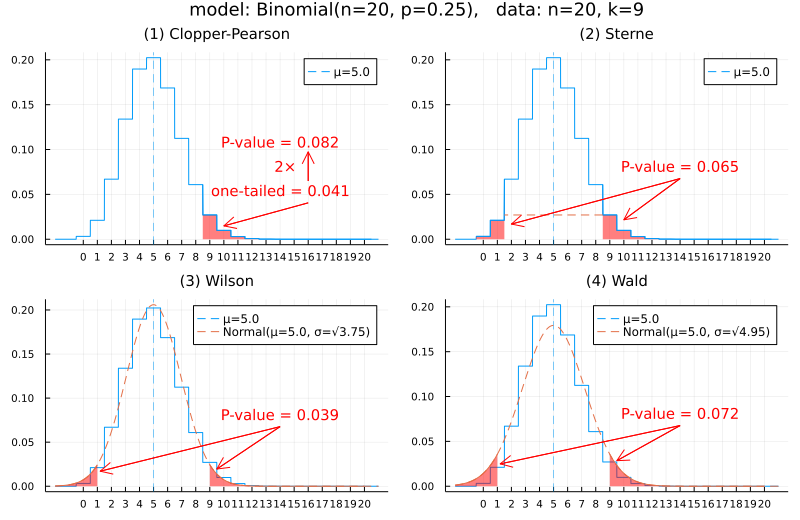

In [35]:
illustrate_binomial_pvalues()

### 4種のP値函数のプロット

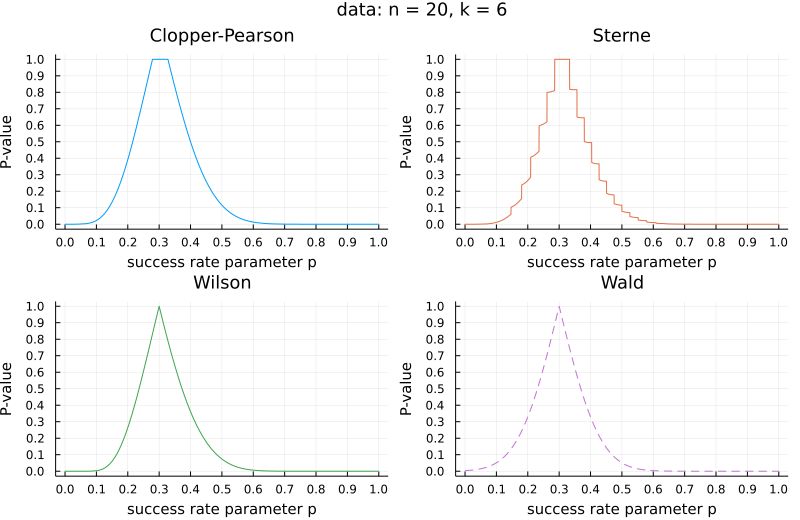

In [36]:
plot_binom_pvaluefunctions()

┌ Info: Saved animation to 
│   fn = D:\OneDrive\work\Statistics\2022\images\pvaluefunction20.gif
└ @ Plots D:\.julia\packages\Plots\mnkn4\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\work\\Statistics\\2022\\images\\pvaluefunction20.gif")
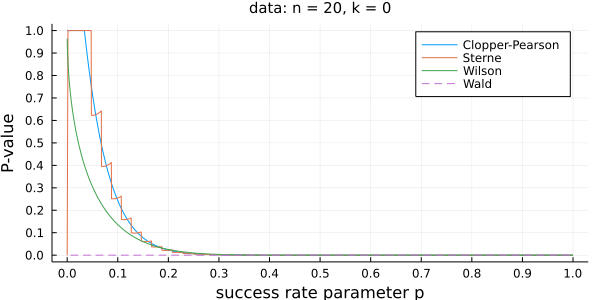

In [37]:
gif_binomtest()

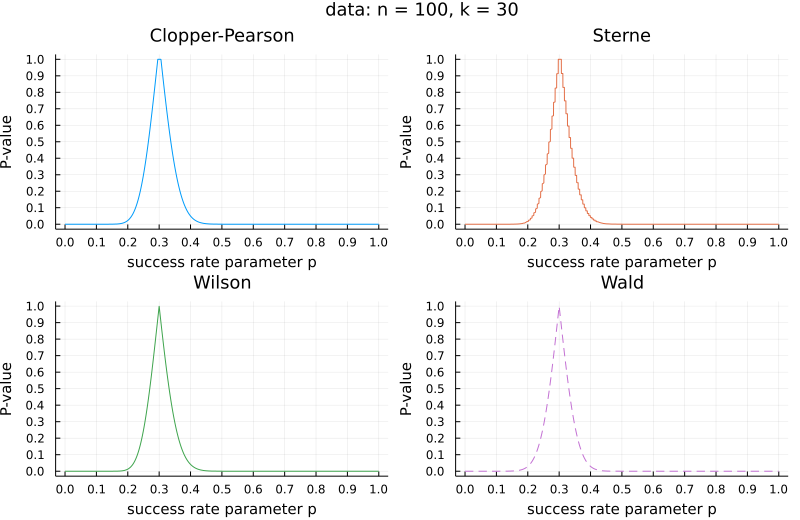

In [38]:
plot_binom_pvaluefunctions(n = 100, k = 30)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\work\Statistics\2022\images\pvaluefunction100.gif
└ @ Plots D:\.julia\packages\Plots\mnkn4\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\work\\Statistics\\2022\\images\\pvaluefunction100.gif")
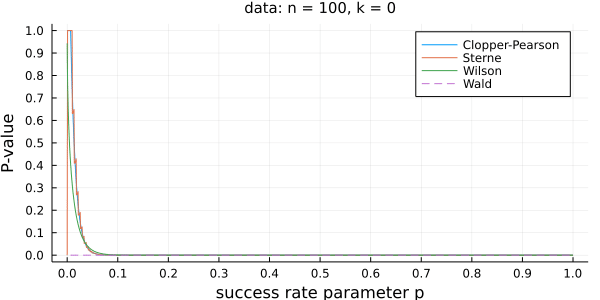

In [39]:
gif_binomtest(; n = 100, fn = "images/pvaluefunction100.gif", fps = 20)

PDFファイルではこの動画を見ることはできない.  作成した動画は

* https://github.com/genkuroki/Statistics/blob/master/2022/images/pvaluefunction20.gif
* https://github.com/genkuroki/Statistics/blob/master/2022/images/pvaluefunction100.gif

でも見ることができる.

### 4種の信頼区間の同時プロット

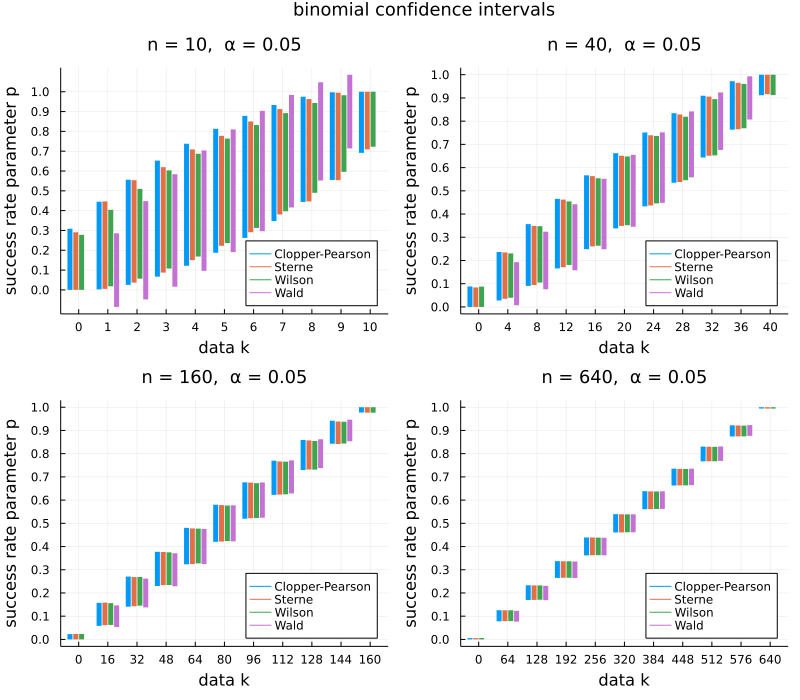

In [40]:
plot(
    plot_binom_confints(10), plot_binom_confints(40),
    plot_binom_confints(160), plot_binom_confints(640);
    size=(800, 700), layout=(2,2),
    plot_title="binomial confidence intervals"
)

* 信頼区間は $n$ を4倍すると概ね半分の長さになる.
* 多くの場合にClopper-Pearsonの信頼区間の長さが最も長くなっている.
* 多くの場合にWilsonの信頼区間が最も短くなっている.
* Waldの信頼区間は $k$ または $n-k$ が小さいときに他の3つからのずれが大きくなる.
* $n$ を大きくするとどれもほぼ同じになる.

## Clopper-Pearson

### Clopper-Pearsonの信頼区間を与えるP値関数

データ「$n$ 回中 $k$ 回成功」について, 「データの数値以上に極端な」の意味を「$k$ 以上の」または「$k$ 以下の」の確率の小さい方とした場合.  ただし, P値はその確率の2倍として定義する($1$ を超えないように $1$ より大きくなったら $1$ に切り詰める):

$$
\pvalue_\CP(k|n, p=p_0) = \min\begin{pmatrix}
1 \\
2\cdf(\Binomial(n,p_0), k) \\
2(1 - \cdf(\Binomial(n,p_0), k-1)) \\
\end{pmatrix}
$$

$\cdf(\Binomial(n,p_0), k)$ は二項分布の累積分布函数なので, 二項分布 $\Binomial(n,p_0)$ 内で $k$ 以下になる確率であり, $1 - \cdf(\Binomial(n,p_0), k-1)$ は $k$ 以上になる確率である. それらの2倍の小さい方をP値として採用すると, Clopper-Pearsonの信頼区間を与えるP値函数が得られる.  ただし, それだとP値の値が $1$ を超えてしまう場合が出て来て「見ばえ」がよくないので, $1$ を超えていたら $1$ に切り詰めている.

__復習:__ $\op{cdf}(D, x)$ のcdfは累積分布函数(cumulative distribution function)の略であり, 確率分布 $D$ に従ってランダムに生成された値が $x$ 以下になる確率を意味している. $x$ の動く範囲が整数に限られている場合には $1 - \op{cdf}(D, x-1)$ は確率分布 $D$ に従ってランダムに生成された値が $x$ 以上になる確率に一致する.  具体的な式で書くと,

$$
\begin{aligned}
&
\cdf(\Binomial(n,p_0), k) =
\sum_{i=0}^k \binom{n}{i}p_0^i(1-p_0)^{n-i},
\\ &
1 - \cdf(\Binomial(n,p_0), k-1) =
\sum_{i=k}^n \binom{n}{i}p_0^i(1-p_0)^{n-i}.
\end{aligned}
$$

しかし, この公式を使ってコンピュータ上で実装することは非効率的でかつ信頼区間の公式を得るためにも不便であり, 二項分布とベータ分布の関係を使うという驚くべき方法が有効になる. (二項分布とベータ分布の関係がそのように役に立つことを知らない理系の大学卒業生は結構多いので, ここでこれを学んで理解しておいて知識を普及させるとよいように思われる.)

### Clopper-Pearsonの信頼区間

信頼区間の下限と上限の値 $p_L, p_U$ ($L$, $U$ はそれぞれ lower, upper の頭文字である)を次の条件で定義する:

$$
\begin{aligned}
&
1 - \cdf(\Binomial(n, p_L), k-1) = \alpha/2,
\\ &
\cdf(\Binomial(n, p_U), k) = \alpha/2.
\end{aligned}
$$

この式を直観的に理解したい人はすぐ後で説明する図による説明を参照せよ.

前節でのP値の定義は次のClopper-Pearsonの信頼区間を与える:

$$
\confint_\CP(k|n,\alpha) = [p_L, p_U].
$$

__実際の計算の方法:__ 二項分布とベータ分布の関係

$$
\begin{aligned}
&
1 - \cdf(\Binomial(n, p), k-1) = \cdf(\Beta(k, n-k+1), p),
\\ &
\cdf(\Binomial(n, p), k) = 1 - \cdf(\Beta(k+1, n-k), p)
\end{aligned}
$$

と分位点函数 $\quantile$ が累積分布函数 $\cdf$ の逆函数であることより, 

$$
\begin{aligned}
&
p_L = \quantile(\Beta(k, n-k+1), \alpha/2),
\\ &
p_U = \quantile(\Beta(k+1, n-k), 1-\alpha/2).
\end{aligned}
$$

によって, $p_L, p_U$ を計算可能である.

__復習:__ ベータ分布の分位点函数(quantile function, 累積分布函数の逆函数)は有名な基本特殊函数である正則化された不完全ベータ函数の逆函数になっており, コンピュータでの基本特殊函数ライブラリの中に含まれているので, それを便利に使えばよい.

### Clopper-Pearsonの信頼区間の図による把握

以下の図をよく見れば, $\alpha = 5\%$ の場合の $p_L = p\_L$ と $p_U = p\_U$ を直観的に把握できるだろう. ($L$, $U$ はそれぞれ lower, upper の略である.)

まず, データの数値が与えられたとき, モデルのパラメータ値をP値に対応させる __P値函数__ (P-value function)の立場では, __信頼区間__ (confidence interval)の解釈は易しい. 

__信頼区間はP値函数が有意水準の値を取る2つのパラメータ値に挟まれた区間になる.__

__しかし, P値函数全体のグラフを描けば, 信頼区間を計算しなくても, データとの整合性が低過ぎないパラメータ値の範囲は明らかだろう.__

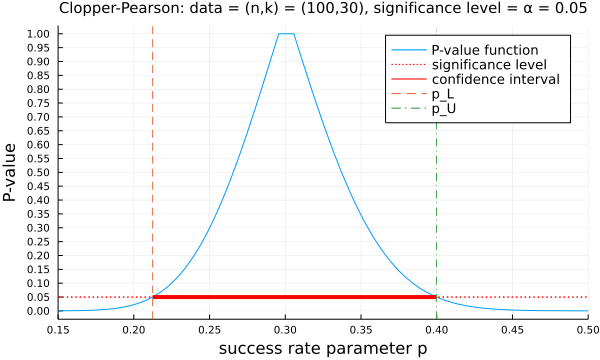

In [41]:
plot_binom_pvalue_and_confint(
    pvalue_clopper_pearson, confint_clopper_pearson, 100, 30;
    name = "Clopper-Pearson: ", xlim=(0.15, 0.5), xtick=0:0.05:1)

Clopper-Pearsonの信頼区間を与えるP値函数のグラフのてっぺんが平らに切れているのは単に片側確率の2倍をP値の定義としているのではなく, $1$ を超えたら $1$ に切り詰めるという定義を採用しているからである.  これはP値の値の範囲を $0$ 以上 $1$ 以下の範囲に収めるための便宜に過ぎない.

P値函数を経由せずに信頼区間の計算の仕方を直接的に理解するには以下のように考えればよい.

$1-\alpha = 95\%$ 信頼区間の下限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を小さくして行って, モデル内でデータの数値 $k$ 以上の値が生成される確率の2倍(＝Clopper-Pearsonの信頼区間を与えるP値)がちょうど $\alpha = 5\%$ になる $p$ の値を見つければよい. そのとき, モデル内でデータの数値 $k$ 以上の値が生成される確率は $\alpha/2=2.5\%$ になっている. そのような $p$ を $p_L = p\_L$ とする.

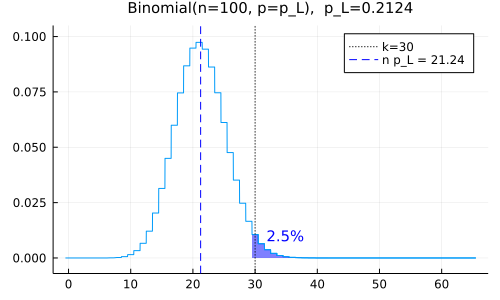

In [42]:
var"Clopper-Pearson: 下側では p = p_L がぎりぎり"

$1-\alpha = 95\%$ 信頼区間の上限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を大きくして行って, モデル内でデータの数値 $k$ 以下の値が生成される確率の2倍(＝Clopper-Pearsonの信頼区間を与えるP値)がちょうど $\alpha = 5\%$ になる $p$ の値を見つければよい. そのとき, モデル内でデータの数値 $k$ 以下の値が生成される確率は $\alpha/2=2.5\%$ になっている. そのような $p$ を $p_U = p\_U$ とする.

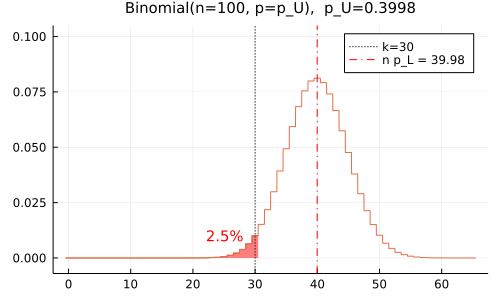

In [43]:
var"Clopper-Pearson: 上側では p = p_U がぎりぎり"

以上をまとめると以下のような図を描ける.

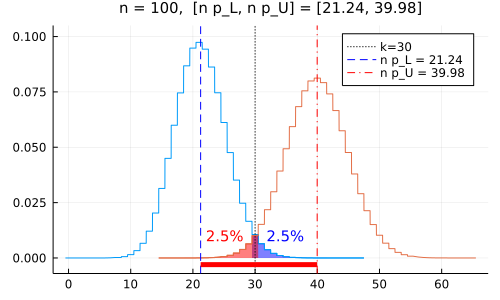

In [44]:
var"Clopper-Pearson: n × 95%信頼区間"

この場合のClopper-Pearsonの信頼区間は $[0.2124, 0.3998]$ になっている.

以上の図は[「例：ベータ函数と二項分布の関係とその応用」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/07-1%20Relationship%20between%20beta%20and%20binomial%20distributions.ipynb)の「Clopper-Pearsonの信頼区間の定義」の節で使ったのと同じものである.

## Sterne

### Sterneの信頼区間を与えるP値関数

「データの数値以上に極端な」の意味を「生成される確率がデータの数値以下の」とした場合:

$$
\pvalue_\Sterne(k|n,p=p_0) =
\sum_{\text{$j$ satisfying $P(j|n,p_0)\le P(k|n,p_0)$}} P(j|n,p_0).
$$

これは, モデル内での生成確率 $P(j|n,p_0)$ がデータの数値と同じ値の生成確率 $P(k|n,p_0)$ 以下になる $j$ について確率 $P(j|n,p_0)$ を足し上げたものである.

__注意:__ Clopper-Pearsonの信頼区間を与えるP値もSterneの信頼区間を与えるP値も第一種の過誤の確率が常に有意水準以下になるという意味で保守的(conservative)なP値の定義になっている.  そして, Sterneの信頼区間を与えるP値の方が小さな値になることが多いということも知られている. この基準ではSterneの信頼区間を与えるP値に方がClopper-Pearsonの信頼区間を与えるP値よりも優れていると言える.  しかし, Sterneの信頼区間を与えるP値の効率的実装はClopper-Pearsonの信頼区間を与えるP値の実装よりもずっと複雑になってしまう.

### Sterneの信頼区間

上で定義したP値の定義はSterneの信頼区間([Sterne (1954)](https://www.jstor.org/stable/2333026))を与える:

$$
\confint_\Sterne(k|n,\alpha) =
\{\,p_0 \in [0,1]\mid \pvalue_\Sterne(k|n,p=p_0) \ge \alpha\,\}.
$$

Sterneの信頼区間は被覆確率(coverage probability)や長さの期待値(expected length)の基準から, Clopper-Pearsonの信頼区間よりも優れていることが知られている.

しかし, 効率的な計算の実装はずっと複雑になり, Sterneの信頼区間の計算のためにはコンピュータの取り扱いに習熟する必要がある.  このノートでは読者にそこまで要求するつもりはない. しかし, プログラミングに自信がある人達はSterneの信頼区間の実装を自力で試してみると大変良い勉強になると思われる.

__注意:__ このタイプの信頼区間は稀に区間にならない場合がある. そのような稀な場合にも区間にすることにこだわるならば, P値が $\alpha$ 以上になる $p=p_0$ 全体の集合を含む最小の区間を改めて信頼区間の定義とするというような処置が必要になる. その場合には以下のようになる:

$$
\confint_\Sterne(k|n,\alpha) = [p_\inf, p_\sup].
$$

ここで,

$$
\begin{aligned}
p_\inf &= \inf
\{\,p_0 \in [0,1]\mid \pvalue_\Sterne(k|n,p=p_0) \ge \alpha\,\},
\\
p_\sup &= \sup
\{\,p_0 \in [0,1]\mid \pvalue_\Sterne(k|n,p=p_0) \ge \alpha\,\}.
\end{aligned}
$$

__注意:__ Sterneの信頼区間とClopper-Pearsonの信頼区間などの比較については例えば以下の報告がある:

* 原茂恵美子, 武藤彬正, 宮島育哉, 榊原伊織, SASによる二項比率における正確な信頼区間の比較, 2014. \[[pdf](https://www.sas.com/content/dam/SAS/ja_jp/doc/event/sas-user-groups/usergroups14-d-05.pdf)\]

### Sterneの信頼区間の図による把握

以下の図をよく見れば, $\alpha = 5\%$ の場合の $p_L = p\_L$ と $p_U = p\_U$ を直観的に把握できるだろう.

まず, データの数値が与えられたとき, モデルのパラメータ値をP値に対応させる __P値函数__ (P-value function)の立場では, __信頼区間__ (confidence interval)の解釈は易しい. 

__信頼区間はP値函数が有意水準の値を取る2つのパラメータ値に挟まれた区間になる.__

__しかし, P値函数全体のグラフを描けば, 信頼区間を計算しなくても, データとの整合性が低過ぎないパラメータ値の範囲は明らかだろう.__

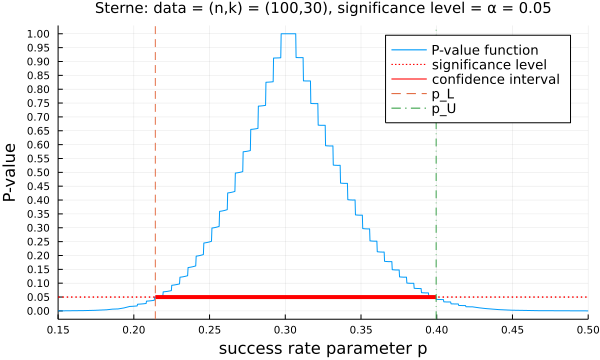

In [45]:
plot_binom_pvalue_and_confint(
    pvalue_sterne, confint_sterne, 100, 30;
    name = "Sterne: ", xlim=(0.15, 0.5), xtick=0:0.05:1)

P値函数を経由せずに信頼区間の計算の仕方を直接的に理解するには以下のように考えればよい.

$1-\alpha = 95\%$ 信頼区間の下限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を小さくして行って, モデル内でデータの数値 $k$ 以上の値が生成される確率とその反対側の確率の和(＝Sterneの信頼区間を与えるP値)が $\alpha = 5\%$ 以上になるような $p$ の値の下限を見つければよい. そのような $p$ を $p_L = p\_L$ とする.

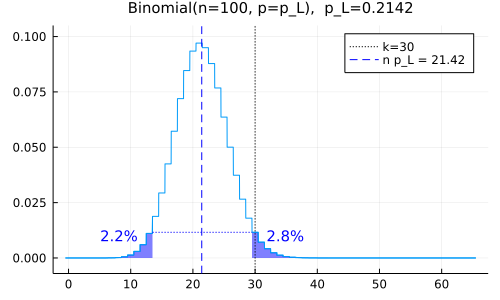

In [46]:
var"Sterne: 下側では p = p_L がぎりぎり"

$1-\alpha = 95\%$ 信頼区間の上限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を大きくして行って, モデル内でデータの数値 $k$ 以下の値が生成される確率とその反対側の確率の和(＝Sterneの信頼区間を与えるP値)が $\alpha = 5\%$ 以上になるような $p$ の値の上限を見つければよい. そのような $p$ を $p_U = p\_U$ とする.

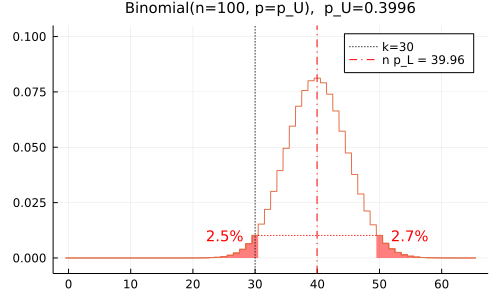

In [47]:
var"Sterne: 上側では p = p_U がぎりぎり"

以上をまとめると以下のような図を描ける.

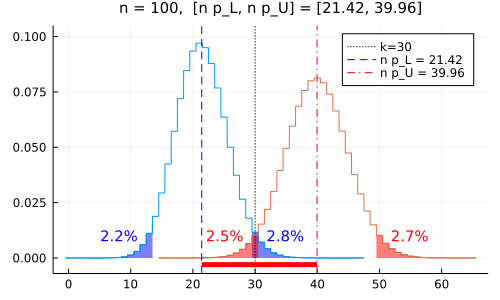

In [48]:
var"Sterne: n × 95%信頼区間"

この場合のSterneの信頼区間は $[0.2142, 0.3996]$ になっている.

これは, 同じ場合のClopper-Pearsonの信頼区間の $[0.2124, 0.3998]$ よりもほんの少し狭いが, ほぼ同じであると言ってよいだろう.

### おまけ: R言語のbinom.testについて

R言語の `binom.test` がデフォルトで表示するP値はSterneの信頼区間を与えるP値であるが, それと同時に表示される信頼区間はClopper-Pearsonの信頼区間の方になってしまっている.  そのせいで, P値が有意水準未満なのに, 帰無仮説を与える成功確率パラメータ値が信頼区間に含まれてしまう場合がある.

In [49]:
R"binom.test(10, 20, p = 0.72, conf.level = 0.95)"

RObject{VecSxp}

	Exact binomial test

data:  10 and 20
number of successes = 10, number of trials = 20, p-value = 0.04277
alternative hypothesis: true probability of success is not equal to 0.72
95 percent confidence interval:
 0.2719578 0.7280422
sample estimates:
probability of success 
                   0.5 



上のRの`binom.test`の結果と以下を比較してみよ.

In [50]:
α = 0.05
n, k = 20, 10
null = Binomial(n, 0.72)

Binomial{Float64}(n=20, p=0.72)

In [51]:
# Sterneの信頼区間を与えるP値を定義通りに計算(計算効率はよくない)
p_value_sterne =
    sum(pdf(null, i) for i in 0:n if pdf(null, i) ⪅ pdf(null, k))
@show p_value_sterne;

p_value_sterne = 0.04276902774675169


In [52]:
# p を pvalue_sterne - α に対応させる函数が
# 0 になる 0 から 1 のあいだの p 達を求めれば,
# Sterneの信頼区間を計算できる.
conf_int_sterne = find_zeros(0, 1) do p
    null = Binomial(n, p)
    pvalue_sterne =
        sum(pdf(null, i) for i in 0:n if pdf(null, i) ⪅ pdf(null, k))
    pvalue_sterne - α
end
@show conf_int_sterne;

conf_int_sterne = [0.2927095227968867, 0.7072904772031132]


[`f(a, b) do ... end` 構文の解説](https://docs.julialang.org/en/v1/manual/functions/#Do-Block-Syntax-for-Function-Arguments)

In [53]:
# Clopper-Pearsonの信頼区間を与えるP値を定義通りに計算
p_value_clopper_pearson = min(1, 2cdf(null, k), 2(1-cdf(null, k-1)))
@show p_value_clopper_pearson;

p_value_clopper_pearson = 0.06093072477502701


In [54]:
# Clopper-Pearsonの信頼区間をベータ分布を使って計算
conf_int_clopper_pearson =
    [quantile(Beta(k, n-k+1), α/2), quantile(Beta(k+1, n-k), 1-α/2)]
@show conf_int_clopper_pearson;

conf_int_clopper_pearson = [0.27195784956079183, 0.7280421504392082]


有意水準が $\alpha = 5\%$ で, 「$20$ 回中 $10$ 回成功」というデータが得られたときに, 仮説「成功確率は $p=0.72$ である」のP値と成功確率 $p$ の信頼区間は以下の表のようになる:

$$
\begin{array}{|c|c|c|}
\hline
\text{計算法} & \text{仮説 $p=0.72$ のP値} & \text{信頼区間} \\ 
\hline
\text{Sterne} & 4.277\% < \alpha = 5\% & 0.72 \not\in [0.2927095, 0.7072905] \\
\hline
\text{Clopper-Pearson} & 6.093\% > \alpha = 5\% & 0.72 \in [0.2719578, 0.7280422] \\
\hline
\end{array}
$$

このようにP値と信頼区間の表裏一体性に忠実であれば, P値が有意水準未満であることと, 信頼区間に帰無仮説を与えるパラメータ値が含まれないことが同値になる.  しかし, R言語の `binom.test` は信頼区間の表裏一体正を無視しているので, 整合性がない結果が稀に表示されることがあるので注意が必要である.

他にも `binom.test(31, 100, p = 0.41)` で表示されるP値と $95\%$ 信頼区間も不整合になる.

In [55]:
R"binom.test(31, 100, p = 0.41)"

RObject{VecSxp}

	Exact binomial test

data:  31 and 100
number of successes = 31, number of trials = 100, p-value = 0.04238
alternative hypothesis: true probability of success is not equal to 0.41
95 percent confidence interval:
 0.2212888 0.4103146
sample estimates:
probability of success 
                  0.31 



帰無仮説 $p = 0.41$ のP値が $5\%$ 未満なのに, $95\%$ 信頼区間が $p = 0.41$ を含んでいる.

In [56]:
@show pvalue_sterne(100, 31, 0.41)
@show confint_sterne(100, 31)
println()
@show pvalue_clopper_pearson(100, 31, 0.41)
@show confint_clopper_pearson(100, 31);

pvalue_sterne(100, 31, 0.41) = 0.04238064409855778
confint_sterne(100, 31) = [0.22393060068670914, 0.409659837525102]

pvalue_clopper_pearson(100, 31, 0.41) = 0.05074263936104193
confint_clopper_pearson(100, 31) = [0.22128879213067107, 0.41031455416019924]


__このような例を見れば, 必然性皆無の閾値である有意水準の設定の下で, P値が有意水準未満になったか否かで一喜一憂したり, 帰無仮説のパラメータ値を信頼区間が含んでいるか否かで一喜一憂することが, 科学的にどれだけ無意味であるかもわかるだろう.__

P値や信頼区間の実装の仕方で閾値の設定による結果は変わることがあるし, 統計ソフトの函数が表示する1つの結果内でさえ, P値と信頼区間のあいだに整合性が無くなっている場合さえある.

### おまけ関連問題: R言語のコードを実行してみよ.

何らかの方法で以下のR言語のコードを実行してみよ.

```R
binom.test(10, 20, p = 0.72, conf.level = 0.95)
```

```R
binom.test(31, 100, p = 0.41)
```

__解答例1(普通):__ [WindowsでのR/RStudioのインストール](https://oku.edu.mie-u.ac.jp/~okumura/stat/R-win.html)を参考にして, 自分のパソコンにR言語をインストールして実行してみた.

__解答例2(易しい):__ [paiza.IO の R Online](https://paiza.io/ja/languages/r) で「コードを作成してみる(無料)」でR言語のコードを実行してみた.

__解答例3(少し面倒):__ Julia言語とR言語を自分のパソコンで使えるようにして, さらにJulia言語に [RCall.jl](https://github.com/JuliaInterop/RCall.jl) をインストールして, このノートと同じ方法でJulia言語からR言語のコードを実行してみた.

__解答例4(これができれば素晴らしい):__ 自分のパソコンでJulia言語, Python言語, R言語を使える環境をすでに整備してあるので, R言語のコードはすぐに実行できた. これをやれるだけの能力がある人達は休日にがんばってこれに挑戦してみるとよいと思う.

## Wilson

### Wilsonの信頼区間を与えるP値函数

データ「$n$ 回中 $k$ 回成功」について, 「データの数値以上に極端な」の意味を二項分布の正規分布近似のもとで「$k$ 以上または $k$ 以下の」とした場合:

$$
\pvalue_\Wilson(k|n,p=p_0) = 
2\left(1 - \cdf\left(\Normal(0,1), \frac{|k - np_0|}{\sqrt{np_0(1-p_0)}}\right)\right).
$$

右辺は標準正規分布において絶対値が $|k-np_0|/\sqrt{np_0(1-p_0)}$ 以上になる確率である.

### Wilsonの信頼区間

以下で使う記号を準備しよう. $\phat, \SEhat, \SE$ を以下のように定義する:

$$
\phat = \frac{k}{n}, \quad
\SEhat = \sqrt{\frac{\phat(1 - \phat)}{n}}, \quad
\SE = \sqrt{\frac{p(1 - p)}{n}}.
$$

ハットが付いている記号はデータの数値から計算した推定値であり, $\SE$ は標準誤差(standard error)の略である.  $\SE$ は $k$ が二項分布 $\Binomial(n,p)$ に従ってランダムに生成されているときの $\phat$ が従う分布の標準偏差になる.

次が成立していることにも注意せよ(左辺の分子分布を $n$ で割る):

$$
\frac{k - np}{\sqrt{np_0(1-p)}} =
\frac{\phat - p}{\SE}.
$$

$k$ が二項分布 $\op{Binomial}(n,p)$ 従ってランダムに生成されているとき, これは近似的に標準正規分布に従うのであった.

この場合の信頼区間は以下のように記述される.

まず, $z_{\alpha/2}$ を次のように定める:

$$
z_{\alpha/2} = \op{quantile}(\op{Normal(0, 1)}, 1 - \alpha/2).
$$

これは標準正規分布において $z_{\alpha/2}$ 以上になる確率が $\alpha/2$ になるという意味である.

In [57]:
@show quantile(Normal(0, 1), 1 - 0.05/2)
@show quantile(Normal(0, 1), 1 - 0.01/2)
@show quantile(Normal(0, 1), 1 - 0.001/2);

quantile(Normal(0, 1), 1 - 0.05 / 2) = 1.9599639845400576
quantile(Normal(0, 1), 1 - 0.01 / 2) = 2.5758293035489053
quantile(Normal(0, 1), 1 - 0.001 / 2) = 3.290526731491931


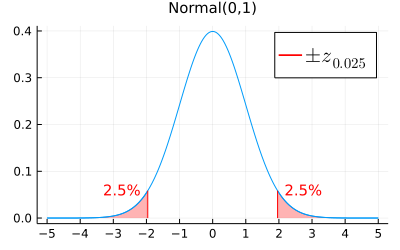

In [58]:
var"z_{0.025}の定義"

以下, 記号の簡単のため次のようにおく:

$$
z=z_{\alpha/2}.
$$

このとき, 標準正規分布において絶対値が $(\phat - p)/\SE$ の絶対値以上の値が生成される確率が $\alpha$ に等しいことと

$$
\frac{(\phat - p)^2}{\SE^2} = z_{\alpha/2}^2 = z^2
$$

となることは同値である. $\SE^2 = p(1-p)/n$ なので, これは $p$ に関する次の二次方程式と同値である:

$$
\left(1 + \frac{z^2}{n}\right)p^2 -2\left(\phat + \frac{z^2}{2n}\right)p + \phat^2 = 0.
$$

そこで, $a,b,c$ を

$$
a = 1 + \frac{z^2}{n}, \quad
b = \phat + \frac{z^2}{2n}, \quad
c = \phat^2
$$

とおく. このとき, 上の二次方程式の2つの解を $p_- \le p_+$ と書く:

$$
p_\pm = \frac{b \pm \sqrt{b^2-ac}}{a} =
\frac{1}{1+z^2/n}\left(
\phat+\frac{z^2}{2n}
\pm z\sqrt{\SEhat^2 + \frac{z^2}{4n^2}}
\right).
$$

このとき,

$$
\confint_\Wilson(k|n,\alpha) :=
\{\, p \in [0, 1] \mid \pvalue_\Wilson(k|n,p) \ge \alpha \,\} =
[p_-, p_+].
$$

これを __Wilsonの信頼区間__ と呼ぶ.

__注意:__ Wilsonの信頼区間を与えるP値はシンプルに定義されたが, 対応する信頼区間の計算には二次方程式を解く必要がある.  次の節で説明するWaldの信頼区間はこの部分を簡略化したものとみなされる. 

__注意:__ 上で省略した計算の細部は自分で埋めよ.  Wilsonの信頼区間の導出については [「例：ベータ函数と二項分布の関係とその応用」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/07-1%20Relationship%20between%20beta%20and%20binomial%20distributions.ipynb)の「Wilsonの信頼区間の基礎」の節も参照せよ.

### Wilsonの信頼区間の図による把握

以下の図をよく見れば, $\alpha = 5\%$ の場合の $p_L = p\_L$ と $p_U = p\_U$ を直観的に把握できるだろう.

まず, データの数値が与えられたとき, モデルのパラメータ値をP値に対応させる __P値函数__ (P-value function)の立場では, __信頼区間__ (confidence interval)の解釈は易しい. 

__信頼区間はP値函数が有意水準の値を取る2つのパラメータ値に挟まれた区間になる.__

__しかし, P値函数全体のグラフを描けば, 信頼区間を計算しなくても, データとの整合性が低過ぎないパラメータ値の範囲は明らかだろう.__

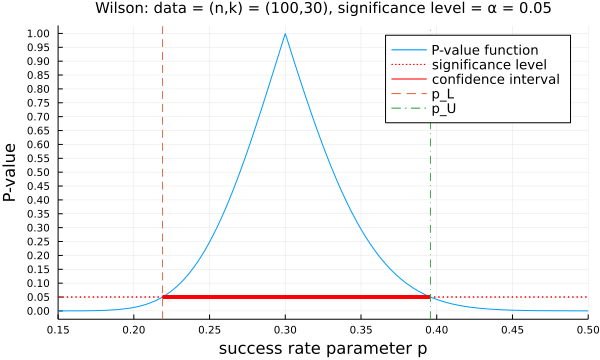

In [59]:
plot_binom_pvalue_and_confint(
    pvalue_wilson, confint_wilson, 100, 30;
    name = "Wilson: ", xlim=(0.15, 0.5), xtick=0:0.05:1)

P値函数を経由せずに信頼区間の計算の仕方を直接的に理解するには以下のように考えればよい.

$1-\alpha = 95\%$ 信頼区間の下限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を小さくして行って, その二項分布を近似する正規分布内でデータの数値 $k$ 以上の値が生成される確率とその反対側の確率の和(＝Wilsonの信頼区間を与えるP値)がちょうど $\alpha = 5\%$ になるような $p$ を見つければよい. そのような $p$ を $p_L = p\_L$ とする.

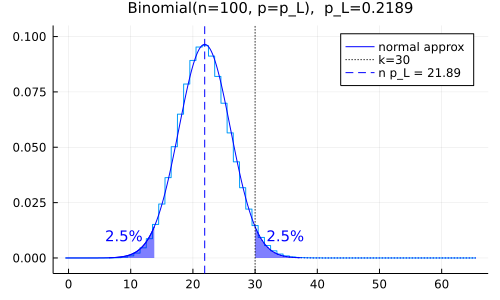

In [60]:
var"Wilson: 下側では p = p_L がぎりぎり"

$1-\alpha = 95\%$ 信頼区間の上限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を大きくして行って, その二項分布を近似する正規分布内でデータの数値 $k$ 以下の値が生成される確率とその反対側の確率の和(＝Wilsonの信頼区間を与えるP値)がちょうど $\alpha = 5\%$ になるような $p$ を見つければよい. そのような $p$ を $p_U = p\_U$ とする.

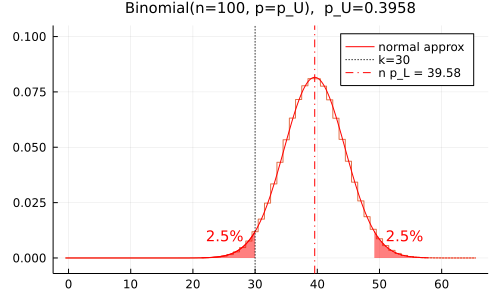

In [61]:
var"Wilson: 上側では p = p_U がぎりぎり"

以上をまとめると以下のような図を描ける.

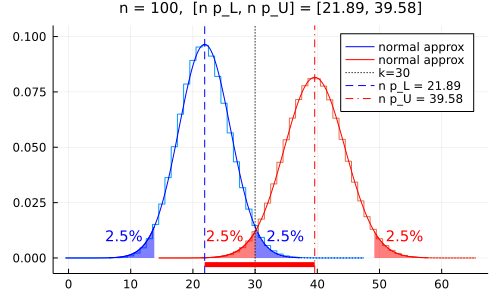

In [62]:
var"Wilson: n × 95%信頼区間"

この場合のWilsonの信頼区間は $[0.2189, 0.3958]$ である.

これは, 同じ場合のClopper-Pearsonの信頼区間の $[0.2124, 0.3998]$ とSterneの信頼区間は $[0.2142, 0.3996]$ の両方よりも少し狭いが, ほぼ同じであると言ってよいだろう.

### おまけ: R言語のprop.testについて

R言語では `prop.test` 函数でWilsonの信頼区間を与えるP値とWilsonの信頼区間を計算できる. ただし, `correct = FALSE` として, 連続性補正(continuity correction)をオフにしなければ, 上で説明した(補正無しの)Wilsonの信頼区間およびそれを与えるP値とはぴったり一致しない値が表示される.

__注意:__ 連続性補正については[「大数の法則と中心極限定理」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/05%20Central%20limit%20theorem.ipynb)の「連続性補正とmid-P補正」の節を参照せよ.

__注意:__ 筆者の個人的な意見では, Wilsonの信頼区間の計算で連続性補正は使用しない方が良いように思われる. 

その1つ目の理由は連続性補正を使って, Wilsonの信頼区間をClopper-Pearsonの信頼区間に近付けるくらいなら, 最初からClopper-Pearsonの信頼区間を使った方がより正確で好ましいと考えられるからである.  コンピュータを自由に使えなかった時代にはClopper-Pearsonの信頼区間の計算に必要な正則化不完全ベータ函数の逆函数を気軽に利用できなかったかもしれないが, 現代においては基本特殊函数ライブラリの実装が普及しており, そのようなことはない.

2つ目の理由は補正無しのWilsonの信頼区間を与えるP値は第一種の過誤の確率が有意水準を超える場合があるという欠点はあるが, 平均的には, Clopper-Pearsonの信頼区間を与えるP値よりも第一種の過誤の確率が有意水準に近くなる. 

Clopper-Pearsonの信頼区間を与えるP値は第一種の過誤の確率が確実に有意水準以下になるという保守的な利点を持つが, 無駄に大きめの値になり易いという欠点がある.

トレードオフを考慮して, Clopper-Pearsonの信頼区間やそれを与えるP値の代わりに, 補正無しのWilsonの信頼区間とそれを与えるP値を使うことは十分に合理的な選択肢になる可能性がある.

__注意:__ Sterneの信頼区間を与えるP値も第一種の過誤の確率が確実に有意水準以下になるという保守的な利点を持っており, Clopper-Pearsonの信頼区間を与えるP値と比較したとき相対的に無駄に大きめの値になり難いという利点を持っている. しかし, 離散分布におけるSterneの信頼区間を与えるP値函数は連続にも単峰型にもならないという欠点や, 効率的な実装が複雑になりやすいという欠点を持つ. 

あるP値の定義が他のP値の定義よりも一方的に優れているということはなく, どのP値の定義も利点と欠点を合わせ持っている.  どれを使用するかは, ユーザー側のトレードオフの考え方に基づく判断に任されることになる.

In [63]:
# これは連続性補正有りの計算結果になっており,
# 上で説明した補正無しのWilsonの信頼区間とそれを与えるP値とは異なる.
R"prop.test(10, 20, p = 0.72, conf.level = 0.95)"

RObject{VecSxp}

	1-sample proportions test with continuity correction

data:  10 out of 20, null probability 0.72
X-squared = 3.7723, df = 1, p-value = 0.05211
alternative hypothesis: true p is not equal to 0.72
95 percent confidence interval:
 0.2785367 0.7214633
sample estimates:
  p 
0.5 



In [64]:
# 連続性補正無しの計算結果
R"prop.test(10, 20, p = 0.72, conf.level = 0.95, correct = FALSE)"

RObject{VecSxp}

	1-sample proportions test without continuity correction

data:  10 out of 20, null probability 0.72
X-squared = 4.8016, df = 1, p-value = 0.02843
alternative hypothesis: true p is not equal to 0.72
95 percent confidence interval:
 0.299298 0.700702
sample estimates:
  p 
0.5 



以上のR言語による計算結果と以下のセルでの計算結果を比較してみよ.

In [65]:
n, k, p, α = 20, 10, 0.72, 0.05
@show n k p α
println()
@show z = quantile(Normal(), 1-α/2)
@show p̂ = k/n
@show SE = √(p*(1-p)/n)
@show p̂_L, p̂_U = (k - 0.5)/n, (k + 0.5)/n

p_value_wilson_corrected = 2ccdf(Normal(), (abs(p̂ - p)-0.5/n)/SE)
a, b_L, c_L, b_U, c_U = 1+z^2/n, p̂_L+z^2/(2n), p̂_L^2, p̂_U+z^2/(2n), p̂_U^2
conf_int_wilson_corrected = [(b_L - √(b_L^2-a*c_L))/a, (b_U + √(b_U^2-a*c_U))/a]

p_value_wilson = 2ccdf(Normal(), abs(p̂ - p)/SE)
a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
conf_int_wilson = [(b - √(b^2-a*c))/a, (b + √(b^2-a*c))/a]

println()
@show p_value_wilson_corrected
@show conf_int_wilson_corrected
println()
@show p_value_wilson
@show conf_int_wilson;

n = 20
k = 10
p = 0.72
α = 0.05

z = quantile(Normal(), 1 - α / 2) = 1.9599639845400576
p̂ = k / n = 0.5
SE = √((p * (1 - p)) / n) = 0.10039920318408907
(p̂_L, p̂_U) = ((k - 0.5) / n, (k + 0.5) / n) = (0.475, 0.525)

p_value_wilson_corrected = 0.052107267466663096
conf_int_wilson_corrected = [0.278536702420732, 0.7214632975792679]

p_value_wilson = 0.028433528913982754
conf_int_wilson = [0.299298008198212, 0.7007019918017879]


上のセルでは具体的に計算の仕方が分かるようにあえて素朴にコードを書いて実行している.  その素朴なコードを解読すれば連続性補正の入れ方もわかるだろう.

### Pearsonのχ²検定との関係

標準正規分布に従う確率変数の2乗は自由度 $1$ のχ²分布に従うことを使えば, 上のP値は次のように表される:

$$
\pvalue_\Wilson(k|n,p=p_0) = 
1 - \cdf\left(\Chisq(1), \frac{(k - np_0)^2}{np_0(1-p_0)}\right).
$$

このP値を, スコア統計量(score statistics)に基くP値と呼んだり, Pearsonのχ²統計量

$$
\frac{(k - np_0)^2}{np_0(1-p_0)} =
\frac{(k - np_0)^2}{np_0} +
\frac{((n-k) - n(1-p_0))^2}{n(1-p_0)}
$$

に基くP値と呼んだりする. 一般にPearsonのχ²統計量は

$$
(\text{Pearsonのχ²統計量}) = \sum \frac
{(\text{観測値} - \text{帰無仮説下の統計モデル内での期待値})^2}
{\text{帰無仮説下の統計モデル内での期待値}}
$$

のスタイルで定義される.  上の場合には, 観測値が成功回数 $k$ と失敗回数 $n-k$ であり, 対応する帰無仮説下の統計モデル内での期待値はそれぞれ $np_0$, $n(1-p_0)$ である.

__注意:__ Pearsonのχ²統計量は多項分布モデルでの検定や分割表の独立性検定でも大活躍することになる. 興味がわいた人はおまけの解説も参照せよ.

### おまけ: 多項分布モデルにおけるPearsonのχ²検定

Pearsonのχ²統計量は多項分布モデルでも利用できる.

例えば, 検定したい仮説「A, B, Cが生じる確率はそれぞれ $p_{A,0}, p_{B,0}, p_{C,0}$ である」($p_{A,0}+p_{B,0}+p_{C,0} = 1$)のとき, 「$n$ 回中 A, B, C がそれぞれ $a, b, c$ 回生じた」というデータに対して, Pearsonのχ²統計量を

$$
(\text{Pearsonのχ²統計量}) =
\frac{(a - np_{A,0})^2}{np_{A,0}} +
\frac{(b - np_{B,0})^2}{np_{B,0}} +
\frac{(c - np_{C,0})^2}{np_{C,0}}
$$

で定義できる.  二項分布の中心極限定理の拡張になっている多項分布の中心極限定理によって, このPearsonのχ²統計量は上の仮説下の多項分布内で自由度 $2$ のχ²分布に近似的に従うことを示せる.

このことを使えば上と同様の方法で多項分布モデルの場合にもP値を定義できる.  例えば, 出目に偏りがあることが疑われているサイコロを $n$ 回ふったら $i=1,2,\ldots,6$ の目が $a_i$ 回出たとき, 仮説「すべての目が等確率で出る」に関するPearsonのχ²統計量は

$$
(\text{Pearsonのχ²統計量}) = \sum_{i=1}^6 \frac{(a_i - n/6)^2}{n/6}
$$

になる. 「すべての目が等確率で出る」という仮説下の多項分布内でこのPearsonのχ²統計量は, $n$ が大きいければ, 自由度 $5$ のχ²分布に近似的に従う. このときP値は, 自由度 $5$ のχ²分布に従ってランダムに生成される値がデータから計算されたPearsonのχ²統計量の値以上になる確率として定義される.

In [66]:
function chisq_multinomial(a, p, n=sum(a))
    sum((a[i] - n*p[i])^2/(n*p[i]) for i in eachindex(a, p))
end

function plot_chisq_multinomial(n, p)
    null = Multinomial(n, float(p)) # model of null hypothesis
    df = ncategories(null) - 1 # degree of freedom

    tmp = zeros(ncategories(null))
    chisqs = [chisq_multinomial(rand!(null, tmp), p) for _ in 1:10^6]

    histogram(chisqs; norm=true, alpha=0.3, bin=0:0.5:40,
        label="Pearson's χ²-statistic")
    plot!(Chisq(df); label="Chisq(df = $df)", lw=1.5)
    title!("n = $n, p = $(replace(string(p), r"Rational{.*}"=>"", "//"=>"/"))")
    plot!(; xlim=(-0.5, 20.5), xtick=0:2:30)
end

plot_chisq_multinomial (generic function with 1 method)

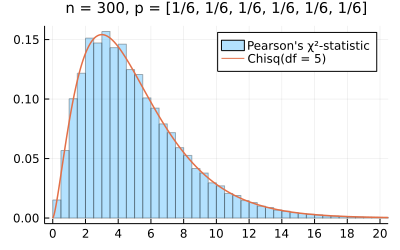

In [67]:
plot_chisq_multinomial(300, fill(1//6, 6))

例えば, 有意水準を $\alpha=0.1\%$ としたとき, $n=300$ 回中 $1,2,\ldots,6$ が出た回数がそれぞれ $75, 35, 43, 40, 47, 60$ ならば, 仮説「すべての目が同じ確率で出る」について, Pearsonのχ²統計量の値は $22.16$ になり, 自由度 $5$ のχ²分布でそれ以上の値になる確率として定義されたP値は $0.05\%$ 未満になるので, 「すべての目が同じ確率で出る」という仮説は有意水準 $\alpha=0.1\%$ で棄却されることになる.

In [68]:
a = [75, 35, 43, 40, 47, 60]
p = fill(1/6, 6)
@show c = chisq_multinomial(a, p)
pvalue_multinomial = ccdf(Chisq(5), c)
@show pvalue_multinomial;

c = chisq_multinomial(a, p) = 22.16
pvalue_multinomial = 0.0004881674827554182


以下のように, サイコロのすべての目が出る確率が $1/6$ でなくても, サイコロの目が出る確率の具体的な値に関する仮説に関するPearsonのχ²統計量は自由度 $5$ のχ²分布に近似的に従う.

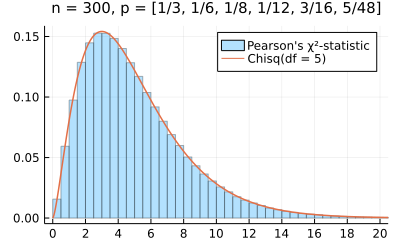

In [69]:
plot_chisq_multinomial(300, [1//3, 1//6, 1//8, 1//12, 3//16, 5//48])

### おまけ(より進んだ話題): 一般のχ²検定で使うχ²分布の自由度

一般のχ²検定で使用するχ²分布の自由度 $\op{df}$ (degree of freedom)は[Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem)より次の公式で決定される:

$$
\begin{aligned}
\op{df} &=
(\text{統計モデルの独立なパラメータの個数}) -
(\text{帰無仮説下の統計モデルの独立なパラメータ個数})
\\ &=
(\text{帰無仮説によって減るモデルの独立なパラメータ個数}).
\end{aligned}
$$

例えば, 上のサイコロの例では, 六項分布モデルのパラメータ数は $6-1 = 5$ 個である. なぜならば $i=1,2,\ldots,6$ の各々の目が出る確率を $p_i$ と書くとき, それらには $p_1+p_2+\cdots+p_6=1$ という条件が課されるので, 独立なパラメータの個数は $5$ 個になる.  そして, 帰無仮説「すべての目が等確率で出る」を課すとすべての $p_i$ の値が $1/6$ に固定されて, 独立に動けるパラメータの個数は $0$ になる.  帰無仮説によって独立なパラメータの個数が $5$ 個減ったので, χ²検定で使うχ²分布の自由度は $5$ になる.

例えば, 帰無仮説が

$$
p_1+p_6=1/3, \quad p_2+p_5=1/3, \quad p_3+p_4=1/3
$$

と書ける. これら3本のうち, 条件 $p_1+p_2+\cdots+p_6=1$ の下で独立な方程式は2本なので, この仮説を課すことによって独立なパラメータの個数は $2$ 個減る. ゆえに, この場合には, χ²検定で使用するχ²分布の自由度は $2$ になる. ただし, この場合には

$$
(\text{Pearsonのχ²統計量}) = \sum \frac
{(\text{観測値} - \text{帰無仮説下の統計モデル内での期待値})^2}
{\text{帰無仮説下の統計モデル内での期待値}}
$$

における「帰無仮説下の統計モデル内での期待値」は統計モデルのパラメータを帰無仮説の制限の下での最尤法で決定することによって求めることになる.

In [70]:
function chisq_multinomial_example2(a)
    n = sum(a)
    r = length(a)
    @assert r == 6
    mle(i) = if i == 1 || i == 6
        a[i]/(3(a[1] + a[6]))
    elseif i == 2 || i == 5
        a[i]/(3(a[2] + a[5]))
    else # i == 3 || i == 4
        a[i]/(3(a[3] + a[4]))
    end
    sum((a[i] - n*mle(i))^2/(n*mle(i)) for i in 1:r)
end

function plot_chisq_multinomial_example2(n, p)
    null = Multinomial(n, float(p)) # model of null hypothesis
    df = 2 # degree of freedom    
    tmp = zeros(ncategories(null))
    chisqs = [chisq_multinomial_example2(rand!(null, tmp)) for _ in 1:10^6]

    histogram(chisqs; norm=true, alpha=0.3, bin=0:0.25:20,
        label="Pearson's χ²-statistic")
    plot!(Chisq(df); label="Chisq(df = $df)", lw=1.5)
    title!("n = $n,  p = $(replace(string(p), r"Rational{.*}"=>"", "//"=>"/"))")
    plot!(; xlim=(-0.5, 10.5), xtick=0:20)
end

plot_chisq_multinomial_example2 (generic function with 1 method)

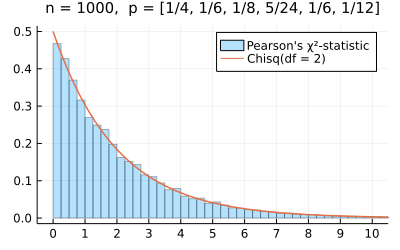

In [71]:
plot_chisq_multinomial_example2(1000, [1//4, 1//6, 1//8, 5//24, 1//6, 1//12])

上のセルの計算例では $(p_1, p_2, p_3, p_4, p_5, p_6) = (1/4, 1/6, 1/8, 5/24, 1/6, 1/12)$ の場合を扱っているが, その $p_i$ 達は仮説 $p_1+p_6 = p_2+p_5 = p_3+p_4=1/3$ を満たしていることに注意せよ.  コード中の `mle(i)` のmleは最尤推定(maximum likelihood estimate)を意味している. 仮説 $p_1+p_6=p_2+p_5=p_3+p_4=1/3$ でパラメータの動く範囲を制限した場合の最尤法の解を手計算で求めて(Lagrangeの未定乗数法を使えば易しい), それを直接的にコーディングしている.

例えば, 有意水準を $\alpha=0.1\%$ としたとき, $n=1000$ 回中 $1,2,\ldots,6$ が出た回数がそれぞれ $235, 195, 175, 175, 195, 225$ ならば, 仮説 $p_1+p_6=p_2+p_5=p_3+p_4=1/3$ について, Pearsonのχ²統計量の値は $15.5$ になり, 自由度 $2$ のχ²分布でそれ以上の値になる確率として定義されたP値は $0.05\%$ 未満になるので, 仮説  $p_1+p_6=p_2+p_5=p_3+p_4=1/3$  は有意水準 $\alpha=0.1\%$ で棄却されることになる.

In [72]:
a = [235, 195, 175, 175, 195, 225]
@show c = chisq_multinomial_example2(a)
pvalue_multinomial_example2 = ccdf(Chisq(2), c)
@show pvalue_multinomial_example2;

c = chisq_multinomial_example2(a) = 15.5
pvalue_multinomial_example2 = 0.00043074254057568753


仮説 $p_1+p_6 = p_2+p_5 = p_3+p_4 = 1/3$ を満たす $p_i$ 達の他の組み合わせでも, その仮説に合わせて作ったPearsonのχ²統計量はその仮説下の多項分布内で近似的に自由度 $2$ のχ²分布に従う.

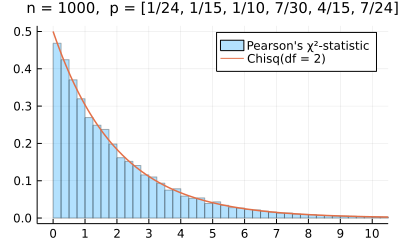

In [73]:
plot_chisq_multinomial_example2(1000, 
    [1//6-1//8, 1//6-1//10, 1//6-1//15, 1//6+1//15, 1//6+1//10, 1//6+1//8])

__注意:__ これに類似した大量の結果が [Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem) から得られることを知った人はこう考えるかもしれない.  統計学を便利に使うためには「Wilks' theorem の証明も理解しなければいけないのか?」と. 

統計学ユーザーになるためには証明を理解する必要はない. 

しかし, ブラックボックスとして認めて使うことはお勧めできない.

なぜならば, 以上で示したように, コンピュータを使えば Wilks' theorem の帰結が実際に成立していることを用意に確認できるからである.

しかも, 実際に自分でやってみればわかることだが, $n\to\infty$ の理想的な状況で成立している近似が, 有限の $n$ でどれだけ有効な近似になっているかは, コンピュータで数値的に確認しないとよくわからないことが多い. 「百聞は一見に如かず」の世界がそこには広がっている!

応用上実際に使われるのは有限の $n$ の場合なので, 証明を理解するだけの数学的実力の持ち主であっても, コンピュータによる数値的確認を十分にやっていないと, 実践的な応用の場面では失敗する場合が出て来てしまうだろう.

## Wald

### Waldの信頼区間を与えるP値関数

$\phat, \SEhat$ を以下のように定義する:

$$
\phat = \frac{k}{n}, \quad
\SEhat = \sqrt{\frac{\phat(1 - \phat)}{n}}.
$$

データ「$n$ 回中 $k$ 回成功」について, 「データの数値以上に極端な」の意味を「$k$ 以上または $k$ 以下の」とした場合.  ただし, 二項分布の中心極限定理(正規分布近似)と分散を推定値に置き換える粗い近似を使う:

$$
\pvalue_\Wald(k|n,p=p_0) = 
2\left(1 - \cdf\left(\Normal(0,1), \frac{|k - np_0|}{\sqrt{n\phat(1-\phat)}}\right)\right).
$$

$\pvalue_\Wilson(k|n,p=p_0)$ との違うは右辺の $\cdf$ の引数の分母の $p_0$ がその推定値 $\phat$ に置き換えられていることである.  これは粗い近似になっているが, その分だけ信頼区間の計算を易しくしてくれる.

### Waldの信頼区間

$z_{\alpha/2} = z_{\alpha/2} = \op{quantile}(\op{Normal(0, 1)}, 1 - \alpha/2)$ とおく.

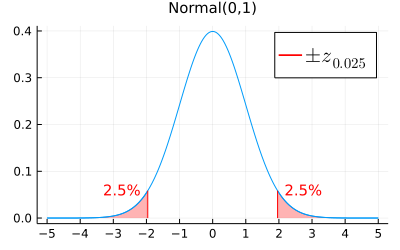

In [74]:
var"z_{0.025}の定義"

この場合の信頼区間 $\{\,p\in[0,1]\mid \pvalue_\Wald(k|n,p)\ge\alpha\,\}$ は次のように表される:

$$
\confint_\Wald(k|n,p=p_0) :=
\left[\phat - z_{\alpha/2}\SEhat,\; \phat + z_{\alpha/2}\SEhat\right].
$$

これを __Waldの信頼区間__ と呼ぶ.

前節の公式と比較すれば, $n$ を大きくすると, これはWilsonの信頼区間をよく近似するようになることがわかる.

Waldの信頼区間の導出については, [「例：ベータ函数と二項分布の関係とその応用」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/07-1%20Relationship%20between%20beta%20and%20binomial%20distributions.ipynb)の「Waldの信頼区間の基礎」の節も参照せよ.

### Waldの信頼区間の図による把握

以下の図をよく見れば, $\alpha = 5\%$ の場合の $p_L = p\_L$ と $p_U = p\_U$ を直観的に把握できるだろう.

まず, データの数値が与えられたとき, モデルのパラメータ値をP値に対応させる __P値函数__ (P-value function)の立場では, __信頼区間__ (confidence interval)の解釈は易しい. 

__信頼区間はP値函数が有意水準の値を取る2つのパラメータ値に挟まれた区間になる.__

__しかし, P値函数全体のグラフを描けば, 信頼区間を計算しなくても, データとの整合性が低過ぎないパラメータ値の範囲は明らかだろう.__

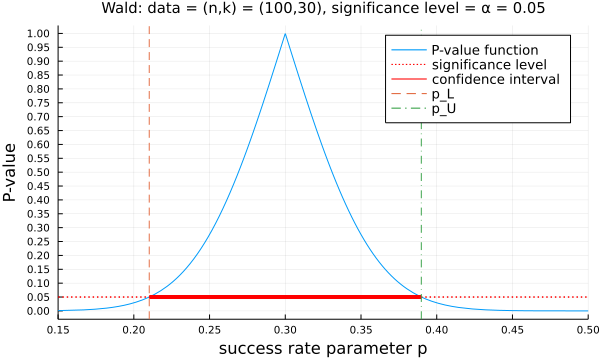

In [75]:
plot_binom_pvalue_and_confint(
    pvalue_wald, confint_wald, 100, 30;
    name = "Wald: ", xlim=(0.15, 0.5), xtick=0:0.05:1)

P値函数を経由せずに信頼区間の計算の仕方を直接的に理解するには以下のように考えればよい.

$1-\alpha = 95\%$ 信頼区間の下限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を小さくして行って, その二項分布を近似する正規分布内でデータの数値 $k$ 以上の値が生成される確率とその反対側の確率の和(＝Waldの信頼区間を与えるP値)がちょうど $\alpha = 5\%$ になるような $p$ を見つければよい. そのような $p$ を $p_L = p\_L$ とする.

ただし, Waldの信頼区間の場合にはWilsonの信頼区間の場合と違って, 二項分布を正規分布で近似するときには, 正規分布の分散をデータの数値から推定したものに固定する. そのことが原因でWaldの信頼区間の場合には二項分布の正規分布近似の誤差は大きめになる. (しかし, $k$ と $n-k$ が十分に大きな場合にはその粗い近似で実用的には十分である.)

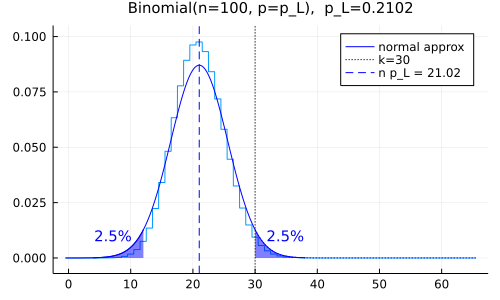

In [76]:
var"Wald: 下側では p = p_L がぎりぎり"

$1-\alpha = 95\%$ 信頼区間の上限を求めるためには, 二項分布モデルの成功確率パラメータ $p$ を大きくして行って, その二項分布を近似する正規分布内でデータの数値 $k$ 以下の値が生成される確率とその反対側の確率の和(＝Waldの信頼区間を与えるP値)がちょうど $\alpha = 5\%$ になるような $p$ を見つければよい. そのような $p$ を $p_U = p\_U$ とする.

ただし, 上でも説明したように, Waldの信頼区間の場合にはWilsonの信頼区間の場合と違って, 二項分布を正規分布で近似するときには, 正規分布の分散をデータの数値から推定したものに固定する. そのことが原因で二項分布の正規分布近似の誤差は大きくなる.

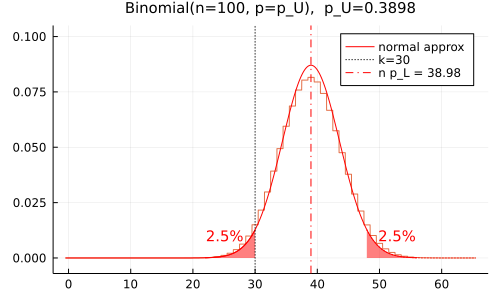

In [77]:
var"Wald: 上側では p = p_U がぎりぎり"

以上をまとめると以下のような図を描ける.

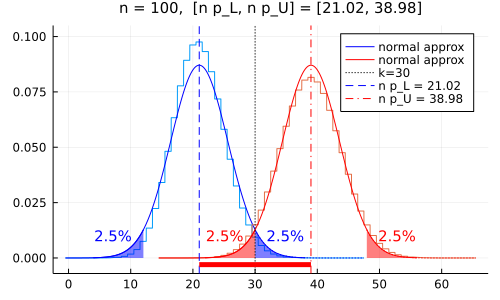

In [78]:
var"Wald: n × 95%信頼区間"

二項分布のギザギザした2つの山の高さと幅は揃っていないが, Waldの信頼区間の場合には, 正規分布近似おける分散をデータの数値からの推定値で固定してしまうので, 正規分布の2つの山の高さと幅は同じになってしまう.

この場合のWaldの信頼区間は $[0.2102, 0.3998]$ である.

これは, 同じ場合のClopper-Pearsonの信頼区間の $[0.2124, 0.3998]$ とSterneの信頼区間は $[0.2142, 0.3996]$ とWilsonの信頼区間は $[0.2189, 0.3958]$ のどれよりも少し広くなっているが, ほぼ同じであると言ってよいだろう.

ただし, Waldの信頼区間は $\phat$ または $1-\phat$ が小さい場合には誤差が大きくなる場合があるので注意が必要である.

### 必修問題: 大阪都構想に関する住民投票の結果から得られる信頼区間達

2015年と2020年の大阪都構想に関する住民投票の結果は

* 2015年: 賛成: 694,844 (49.6%)　反対: 705,585 (50.4%)
* 2020年: 賛成: 675,829 (49.4%)　反対: 692,996 (50.6%)

であった.  これらに対応するデータ「$n$ 人中 $k$ 人賛成」は

* 2015年: $(n, k) = (694844 + 705585, 694844)$
* 2020年: $(n, k) = (675829 + 692996, 675829)$

であるとみなし, 統計モデルとして二項分布を考え, 信頼度を $1-\alpha=0.999=99.9\%$ (有意水準は $\alpha = 0.001 = 0.1\%$) と設定する. これらについて以下を求めよ. 

(1) $99.9\%$ Waldの信頼区間

(2) $99.9\%$ Wilsonの信頼区間

(3) $99.9\%$ Clopper-Pearsonの信頼区間

(4) $99.9\%$ Sterneの信頼区間

数値は小数点以下第4桁まで求めよ. 

__ただし, 最後の(4)だけは必修問題から外す. 自力で求めることができた人は相当に立派だと思われる.__

__結果の解釈の仕方:__ 信頼区間から外れている値の全体は, 有意水準 $\alpha = 0.1\%$ の下で, 「賛成確率は $p=p_0$ である」という仮説下での二項分布モデルとデータの数値が余りにも整合性がないと判定されたパラメータ値 $p_0$ の全体の集合になる.  信頼区間に含まれる $p_0$ の値はモデルとデータの整合性の観点から棄却されていない値になる.

__解答例__ 

(1) $99.9\%$ Waldの信頼区間

* 2015年: $[0.4948, 0.4976]$
* 2020年: $[0.4923, 0.4951]$

(2) $99.9\%$ Wilsonの信頼区間

* 2015年: $[0.4948, 0.4976]$
* 2020年: $[0.4923, 0.4951]$

(3) $99.9\%$ Clopper-Pearsonの信頼区間

* 2015年: $[0.4948, 0.4976]$
* 2020年: $[0.4923, 0.4951]$

(4) $99.9\%$ Sterneの信頼区間

* 2015年: $[0.4948, 0.4976]$
* 2020年: $[0.4923, 0.4951]$

__解答終__

__注意:__ 小数点以下第4桁までの比較では4種の信頼区間はすべて同じになる! このようになる理由は二項分布の中心極限定理である.  これら4種の信頼区間の中でWaldの信頼区間の計算が最も初等的で易しい.  ここまで一致するのであれば, Waldの信頼区間の計算で済ませた方が得だと考えられる.

__結果の解釈:__ 例えば, $99.9\%$ 信頼区間に $0.5$ 以上の値が含まれていないので, 「賛成確率 $p$ は $0.5$ 以上である」であるという仮説下の二項分布モデルは大阪都構想に関する住民投票の結果のデータとは, 有意水準 $0.1\%$ の閾値で余りにも整合していないと判断される. 

__警告:__ $99.9\%$ 信頼区間の $99.9\%$ は整合性の指標であるP値が「低すぎる」と判断するときの閾値(有意水準)を $0.1\%$ に設定したことを意味し, それ以上の意味を持たないことに注意せよ.

#### Julia言語による計算の仕方

具体的な実装についてはこのノートの最初の方にある函数の定義を見て欲しい.

部分的にR言語の計算結果とも比較してみる.

In [79]:
α = 0.001
(n2015, k2015) = (694844 + 705585, 694844)
(n2020, k2020) = (675829 + 692996, 675829)
@rput n2015 k2015 n2020 k2020
r4(x) = round(x; digits=4)

r4 (generic function with 1 method)

In [80]:
# (1) 99.9% Waldの信頼区間
@show confint_wald(n2015, k2015; α)
@show confint_wald(n2020, k2020; α)
println()
@show confint_wald(n2015, k2015; α) .|> r4
@show confint_wald(n2020, k2020; α) .|> r4;

confint_wald(n2015, k2015; α) = [0.4947748562481919, 0.49755535113825894]
confint_wald(n2020, k2020; α) = [0.49232315744006405, 0.4951354293040413]

confint_wald(n2015, k2015; α) .|> r4 = [0.4948, 0.4976]
confint_wald(n2020, k2020; α) .|> r4 = [0.4923, 0.4951]


In [81]:
# (2) 99.9% Wilsonの信頼区間
@show confint_wilson(n2015, k2015; α)
@show confint_wilson(n2020, k2020; α)
println()
@show confint_wilson(n2015, k2015; α) .|> r4
@show confint_wilson(n2020, k2020; α) .|> r4;

confint_wilson(n2015, k2015; α) = [0.4947748912719356, 0.49755537541387646]
confint_wilson(n2020, k2020; α) = [0.4923232126021383, 0.495135473345231]

confint_wilson(n2015, k2015; α) .|> r4 = [0.4948, 0.4976]
confint_wilson(n2020, k2020; α) .|> r4 = [0.4923, 0.4951]


In [82]:
@show R"prop.test(k2015, n2015, conf.level=0.999, correct=F)$conf.int"
@show R"prop.test(k2020, n2020, conf.level=0.999, correct=F)$conf.int";

R"prop.test(k2015, n2015, conf.level=0.999, correct=F)$conf.int" = RObject{RealSxp}
[1] 0.4947749 0.4975554
attr(,"conf.level")
[1] 0.999

R"prop.test(k2020, n2020, conf.level=0.999, correct=F)$conf.int" = RObject{RealSxp}
[1] 0.4923232 0.4951355
attr(,"conf.level")
[1] 0.999



In [83]:
# (3) 99.9% Clopper-Pearsonの信頼区間
@show confint_clopper_pearson(n2015, k2015; α)
@show confint_clopper_pearson(n2020, k2020; α)
println()
@show confint_clopper_pearson(n2015, k2015; α) .|> r4
@show confint_clopper_pearson(n2020, k2020; α) .|> r4;

confint_clopper_pearson(n2015, k2015; α) = [0.49477452283892703, 0.49755572592143626]
confint_clopper_pearson(n2020, k2020; α) = [0.4923228298103796, 0.49513582614939644]

confint_clopper_pearson(n2015, k2015; α) .|> r4 = [0.4948, 0.4976]
confint_clopper_pearson(n2020, k2020; α) .|> r4 = [0.4923, 0.4951]


In [84]:
@show R"binom.test(k2015, n2015, conf.level=0.999)$conf.int"
@show R"binom.test(k2020, n2020, conf.level=0.999)$conf.int";

R"binom.test(k2015, n2015, conf.level=0.999)$conf.int" = RObject{RealSxp}
[1] 0.4947745 0.4975557
attr(,"conf.level")
[1] 0.999

R"binom.test(k2020, n2020, conf.level=0.999)$conf.int" = RObject{RealSxp}
[1] 0.4923228 0.4951358
attr(,"conf.level")
[1] 0.999



In [85]:
# (4) 99.9% Sterneの信頼区間
@show confint_sterne(n2015, k2015; α)
@show confint_sterne(n2020, k2020; α)
println()
@show confint_sterne(n2015, k2015; α) .|> r4
@show confint_sterne(n2020, k2020; α) .|> r4;

confint_sterne(n2015, k2015; α) = [0.494774805693787, 0.4975553874009835]
confint_sterne(n2020, k2020; α) = [0.4923229630950927, 0.4951355997338051]

confint_sterne(n2015, k2015; α) .|> r4 = [0.4948, 0.4976]
confint_sterne(n2020, k2020; α) .|> r4 = [0.4923, 0.4951]


#### WolframAlphaによる計算の仕方

(4)を除いて計算してみよう.

上のJulia言語を用いた計算法は筆者が書いたコードに依存しているので, それを真似たとしても理解に繋がらない危険性がある. WolframAlphaを使って素朴に計算した場合には各ステップが明瞭に見えているので, 何をやっているかが見易い.

$z_{\alpha/2} = z_{0.0005}$ の計算: 

`quantile(NormalDistribution(0,1), 0.9995)` → [実行](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.9995%29) → 3.29053

(1) $99.9\%$ Waldの信頼区間

この場合には $z_{\alpha/2}$ が既知ならば, 残りの計算は四則演算と平方根だけなので電卓でも計算できる.

2015年:

`{k/n - z*sqrt(k/n(1-k/n)/n), k/n + z*sqrt(k/n(1-k/n)/n)} where z = 3.29053, n = 694844 + 705585, k = 694844` → [実行](https://www.wolframalpha.com/input?i=%7Bk%2Fn+-+z*sqrt%28k%28n-k%29%2Fn%5E3%29%2C+k%2Fn+%2B+z*sqrt%28k%28n-k%29%2Fn%5E3%29%7D+where+z+%3D+3.29053%2C+n+%3D+694844+%2B+705585%2C+k+%3D+694844) → {0.494775, 0.497555}

2020年:

`{k/n - z*sqrt(k/n(1-k/n)/n), k/n + z*sqrt(k/n(1-k/n)/n)} where z = 3.29053, n = 675829 + 692996, k = 675829` → [実行](https://www.wolframalpha.com/input?i=%7Bk%2Fn+-+z*sqrt%28k%2Fn%281-k%2Fn%29%2Fn%29%2C+k%2Fn+%2B+z*sqrt%28k%2Fn%281-k%2Fn%29%2Fn%29%7D+where+z+%3D+3.29053%2C+n+%3D+675829+%2B+692996%2C+k+%3D+675829) → {0.492323, 0.495135}

(2) $99.9\%$ Wilsonの信頼区間

この場合には二次方程式を解く必要がある. この計算も $z_{\alpha/2}$ さえ既知ならば, 残りの計算は四則演算と平方根だけなので電卓でも計算できる.

2015年:

`solve (1+z^2/n) p^2 - 2(k/n+z^2/(2n)) p + (k/n)^2 = 0 where z = 3.29053, n = 694844 + 705585, k = 694844` → [実行](https://www.wolframalpha.com/input?i=solve+%281%2Bz%5E2%2Fn%29+p%5E2+-+2%28k%2Fn%2Bz%5E2%2F%282n%29%29+p+%2B+%28k%2Fn%29%5E2+%3D+0+where+z+%3D+3.29053%2C+n+%3D+694844+%2B+705585%2C+k+%3D+694844) → p == 0.494775 || p == 0.497555

2020年: `solve (1+z^2/n) p^2 - 2(k/n+z^2/(2n)) p + (k/n)^2 = 0 where z = 3.29053, n = 675829 + 692996, k = 675829` → [実行](https://www.wolframalpha.com/input?i=solve+%281%2Bz%5E2%2Fn%29+p%5E2+-+2%28k%2Fn%2Bz%5E2%2F%282n%29%29+p+%2B+%28k%2Fn%29%5E2+%3D+0+where+z+%3D+3.29053%2C+n+%3D+675829+%2B+692996%2C+k+%3D+675829) → p == 0.492323 || p == 0.495135

(3) $99.9\%$ Clopper-Pearsonの信頼区間

この場合にはベータ分布の分位点函数(quantile function)が必要になる.

2015年:

`quantile(BetaDistribution(694844, 705585+1), 0.0005)` → [実行](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%28694844%2C+705585%2B1%29%2C+0.0005%29) → 0.494775

`quantile(BetaDistribution(694844+1, 705585), 0.9995)` → [実行](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%28694844%2B1%2C+705585%29%2C+0.9995%29) → 0.497556

2020年:

`quantile(BetaDistribution(675829, 692996+1), 0.0005)` → [実行](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%28675829%2C+692996%2B1%29%2C+0.0005%29) → 0.492323

`quantile(BetaDistribution(675829+1, 692996), 0.9995)` → [実行](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%28675829%2B1%2C+692996%29%2C+0.9995%29&lang=ja) → 0.495136